## 敘述統計 - 以國籍為主
- 前置作業: 執行data_preprocessing.ipynb 檔案

In [1]:
# 敘述統計分析(不包含評論內容)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 載入中文字體
import matplotlib.font_manager as fm

# 設定字體（微軟正黑）
font_path = "C:/Windows/Fonts/msjh.ttc"  # 字體路徑
font_prop = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings("ignore")

In [2]:
# 基礎評分分析
new_basic_info_rating_838 = pd.read_csv('../data/838-new_basic_info_rating.csv')
new_basic_info_rating_838.head()

location_id gmap_location attraction_type  \
0  0x346885034084ae89:0x59a8b1eac5731c29       白楊步道水簾洞         自然景觀與戶外   
1  0x346885034084ae89:0x59a8b1eac5731c29       白楊步道水簾洞         自然景觀與戶外   
2  0x346885034084ae89:0x59a8b1eac5731c29       白楊步道水簾洞         自然景觀與戶外   
3  0x346885034084ae89:0x59a8b1eac5731c29       白楊步道水簾洞         自然景觀與戶外   
4  0x346885034084ae89:0x59a8b1eac5731c29       白楊步道水簾洞         自然景觀與戶外   

  address  score        date language  snownlp_scores_0-100  
0     花蓮縣      3  2025-02-09  zh-Hant                  28.0  
1     花蓮縣      1  2024-12-06  zh-Hant                   0.0  
2     花蓮縣      5  2024-09-21  zh-Hant                   0.0  
3     花蓮縣      5  2024-09-20  zh-Hant                  33.0  
4     花蓮縣      5  2024-09-15  zh-Hant                  16.0

In [3]:
# 評論數篩選器
rating_counts = new_basic_info_rating_838.groupby('gmap_location')['gmap_location'].transform('count')
new_basic_info_rating_838 = new_basic_info_rating_838[rating_counts > 100]
print(new_basic_info_rating_838['gmap_location'].unique().size)

776


In [4]:
# 列出前10大國籍
nationality_counts = new_basic_info_rating_838.groupby('language')['score'].count().sort_values(ascending=False)
print(nationality_counts[:10])

# 取出前n名的 index
rank_n = nationality_counts[:10].index

language
zh-Hant    2469301
en          151221
ko           45818
ja           36353
zh           25614
id            7822
vi            7414
th            6470
fr            2224
de            1799
Name: score, dtype: int64


In [5]:
print(rank_n.values)

['zh-Hant' 'en' 'ko' 'ja' 'zh' 'id' 'vi' 'th' 'fr' 'de']


In [6]:
# 國籍數篩選器
nationality_count_filter = new_basic_info_rating_838['language'].isin(rank_n)
new_basic_info_rating_838 = new_basic_info_rating_838[nationality_count_filter]
print(nationality_count_filter[nationality_count_filter == True].count())

2754036


In [7]:
# 語言標籤轉國籍標籤
nationality_translation = {
    "zh-Hant": "台灣",
    "en": "美國",
    "ko": "韓國",
    "ja": "日本",
    "zh": "中國",
    "id": "印尼",
    "vi": "越南",
    "th": "泰國",
    "fr": "法國",
    "de": "德國",
}

In [8]:
# 直接修改語言欄位的值
new_basic_info_rating_838['language'] = new_basic_info_rating_838['language'].replace(nationality_translation)

In [9]:
nationality_counts = new_basic_info_rating_838.groupby('language')['score'].count().sort_values(ascending=False)
nationality_counts

language
台灣    2469301
美國     151221
韓國      45818
日本      36353
中國      25614
印尼       7822
越南       7414
泰國       6470
法國       2224
德國       1799
Name: score, dtype: int64

## 國籍單維度分析

### 前10大國籍平均評分

language
印尼    4.533751
越南    4.533585
泰國    4.533230
美國    4.453793
法國    4.397932
台灣    4.351754
德國    4.330739
日本    4.269029
中國    4.216288
韓國    4.152211
Name: score, dtype: float64


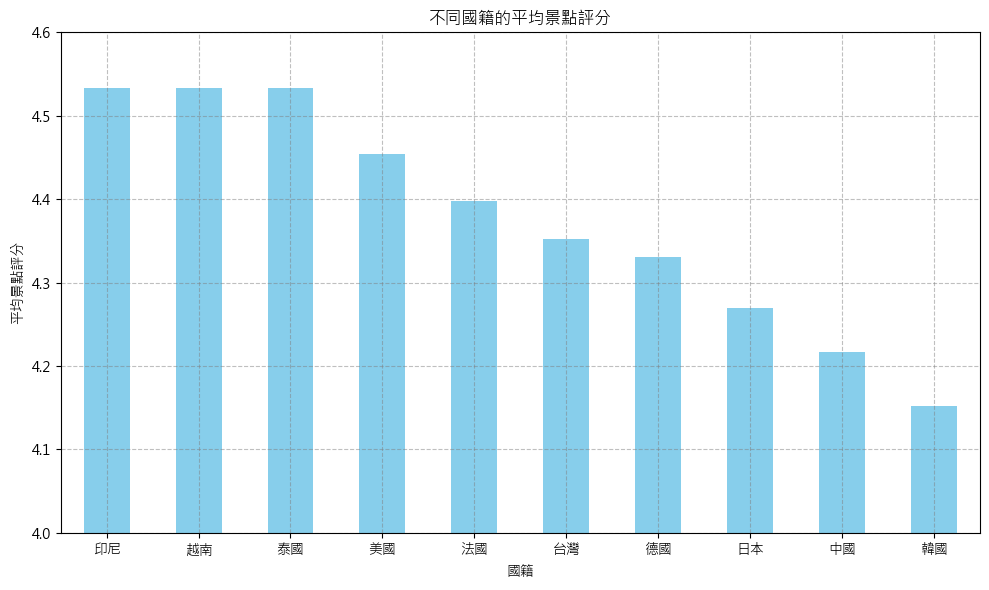

In [10]:
# 國籍平均評分
nationality_groups = new_basic_info_rating_838.groupby('language')['score'].mean().sort_values(ascending=False)
print(nationality_groups)

# 畫圖
ax = nationality_groups.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('國籍')
plt.ylabel('平均景點評分')
plt.title('不同國籍的平均景點評分')

plt.xticks(rotation=0)
plt.yticks([4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6])
plt.grid(linestyle='--',color='gray', alpha=0.5)
plt.ylim(4,4.6)

# 自動調整文字間距
plt.tight_layout()

plt.show()

### 前10大國籍平均情感分數

language
越南    62.774616
泰國    60.038176
印尼    59.819739
德國    59.678710
台灣    58.745174
美國    57.270346
法國    56.666367
中國    55.437729
日本    47.884549
韓國    47.435768
Name: snownlp_scores_0-100, dtype: float64


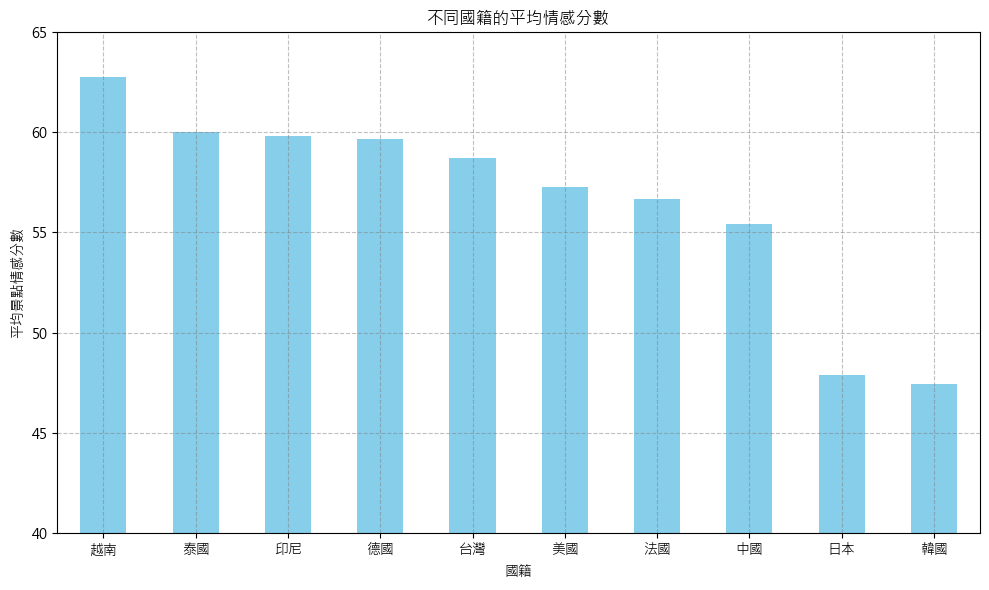

In [11]:
# 國籍平均情感分數
nlp_nationality_groups = new_basic_info_rating_838.groupby('language')['snownlp_scores_0-100'].mean().sort_values(ascending=False)
print(nlp_nationality_groups)

# 畫圖
ax = nlp_nationality_groups.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('國籍')
plt.ylabel('平均景點情感分數')
plt.title('不同國籍的平均情感分數')

plt.xticks(rotation=0)
plt.grid(linestyle='--',color='gray', alpha=0.5)
plt.ylim(40, 65)

# 自動調整文字間距
plt.tight_layout()

plt.show()

### 國籍評分與情感分數並列

          avg_score  average_nlp
language                        
中國         4.216288    55.437729
印尼         4.533751    59.819739
台灣         4.351754    58.745174
德國         4.330739    59.678710
日本         4.269029    47.884549
法國         4.397932    56.666367
泰國         4.533230    60.038176
美國         4.453793    57.270346
越南         4.533585    62.774616
韓國         4.152211    47.435768


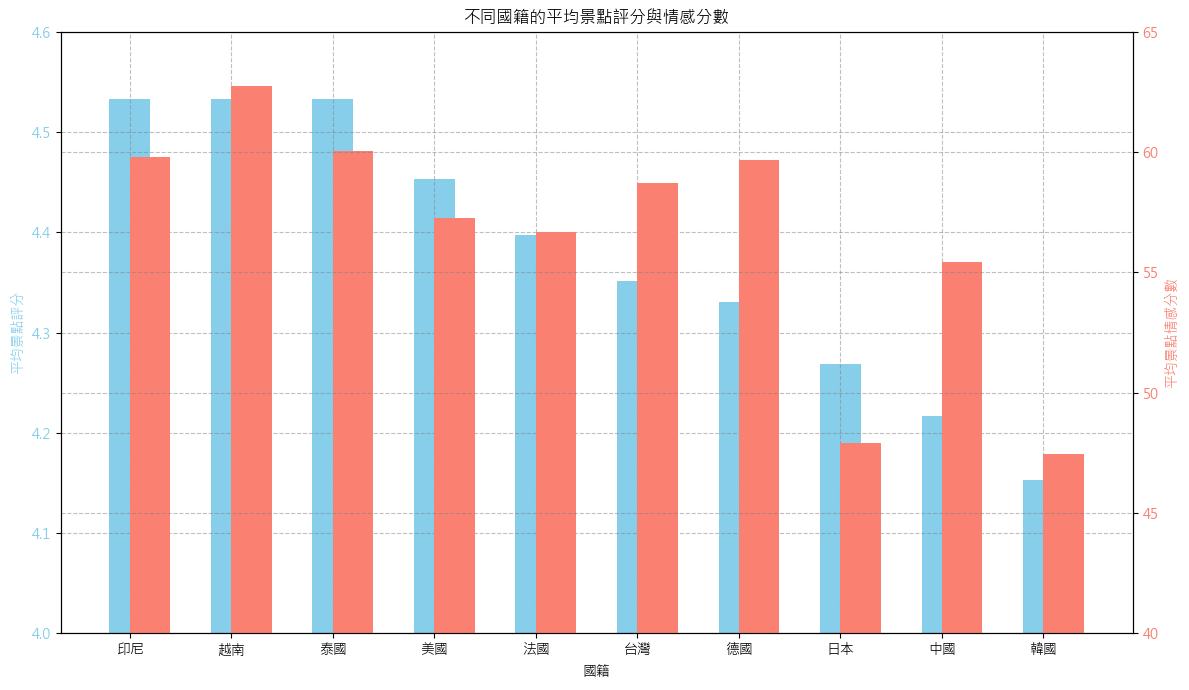

In [12]:
# 國籍評分與情感分數並列

nationality_groups_all = pd.DataFrame({'avg_score':nationality_groups, 'average_nlp':nlp_nationality_groups})
print(nationality_groups_all)

# 畫圖
fig, ax1 = plt.subplots(figsize=(12, 7))  # 調整圖表大小

# 繪製平均評分長條圖 (左 Y 軸)
color = 'skyblue'
ax1.set_xlabel('國籍')
ax1.set_ylabel('平均景點評分', color=color)
ax1.bar(nationality_groups.index, nationality_groups.values, color=color, width=0.4, align='center')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(4, 4.6)
ax1.set_yticks([4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6])

# 創建第二個 Y 軸 (右 Y 軸)
ax2 = ax1.twinx()

# 繪製平均情感分數長條圖 (右 Y 軸)
color = 'salmon'
ax2.set_ylabel('平均景點情感分數', color=color)
ax2.bar(nlp_nationality_groups.index, nlp_nationality_groups.values, color=color, width=0.4, align='edge')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(40, 65)


# 旋轉縣市名稱標籤 使其易於閱讀
plt.xticks(rotation=45, ha='right')
plt.grid(linestyle='--',color='gray', alpha=0.5)

# 設定標題
plt.title('不同國籍的平均景點評分與情感分數')

# 設定 X 軸刻度
plt.xticks(rotation=0)

# 加上格線
ax1.grid(linestyle='--', color='gray', alpha=0.5)

# 自動調整文字間距
plt.tight_layout()

# 顯示圖表
plt.show()

## 國籍與縣市評分

### 國籍縣市平均評分

In [13]:
# 國籍縣市平均評分
top_city_per_nation = new_basic_info_rating_838.groupby(["language", "address"])["score"].mean().groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False)).reset_index()
top_city_per_nation

language address     score
0         中國     連江縣  4.422680
1         中國     台北市  4.382915
2         中國     金門縣  4.381579
3         中國     南投縣  4.284000
4         中國     台中市  4.280995
..       ...     ...       ...
213       韓國     澎湖縣  4.038462
214       韓國     台南市  3.958643
215       韓國     金門縣  3.842105
216       韓國     苗栗縣  3.774194
217       韓國     嘉義市  3.681818

[218 rows x 3 columns]

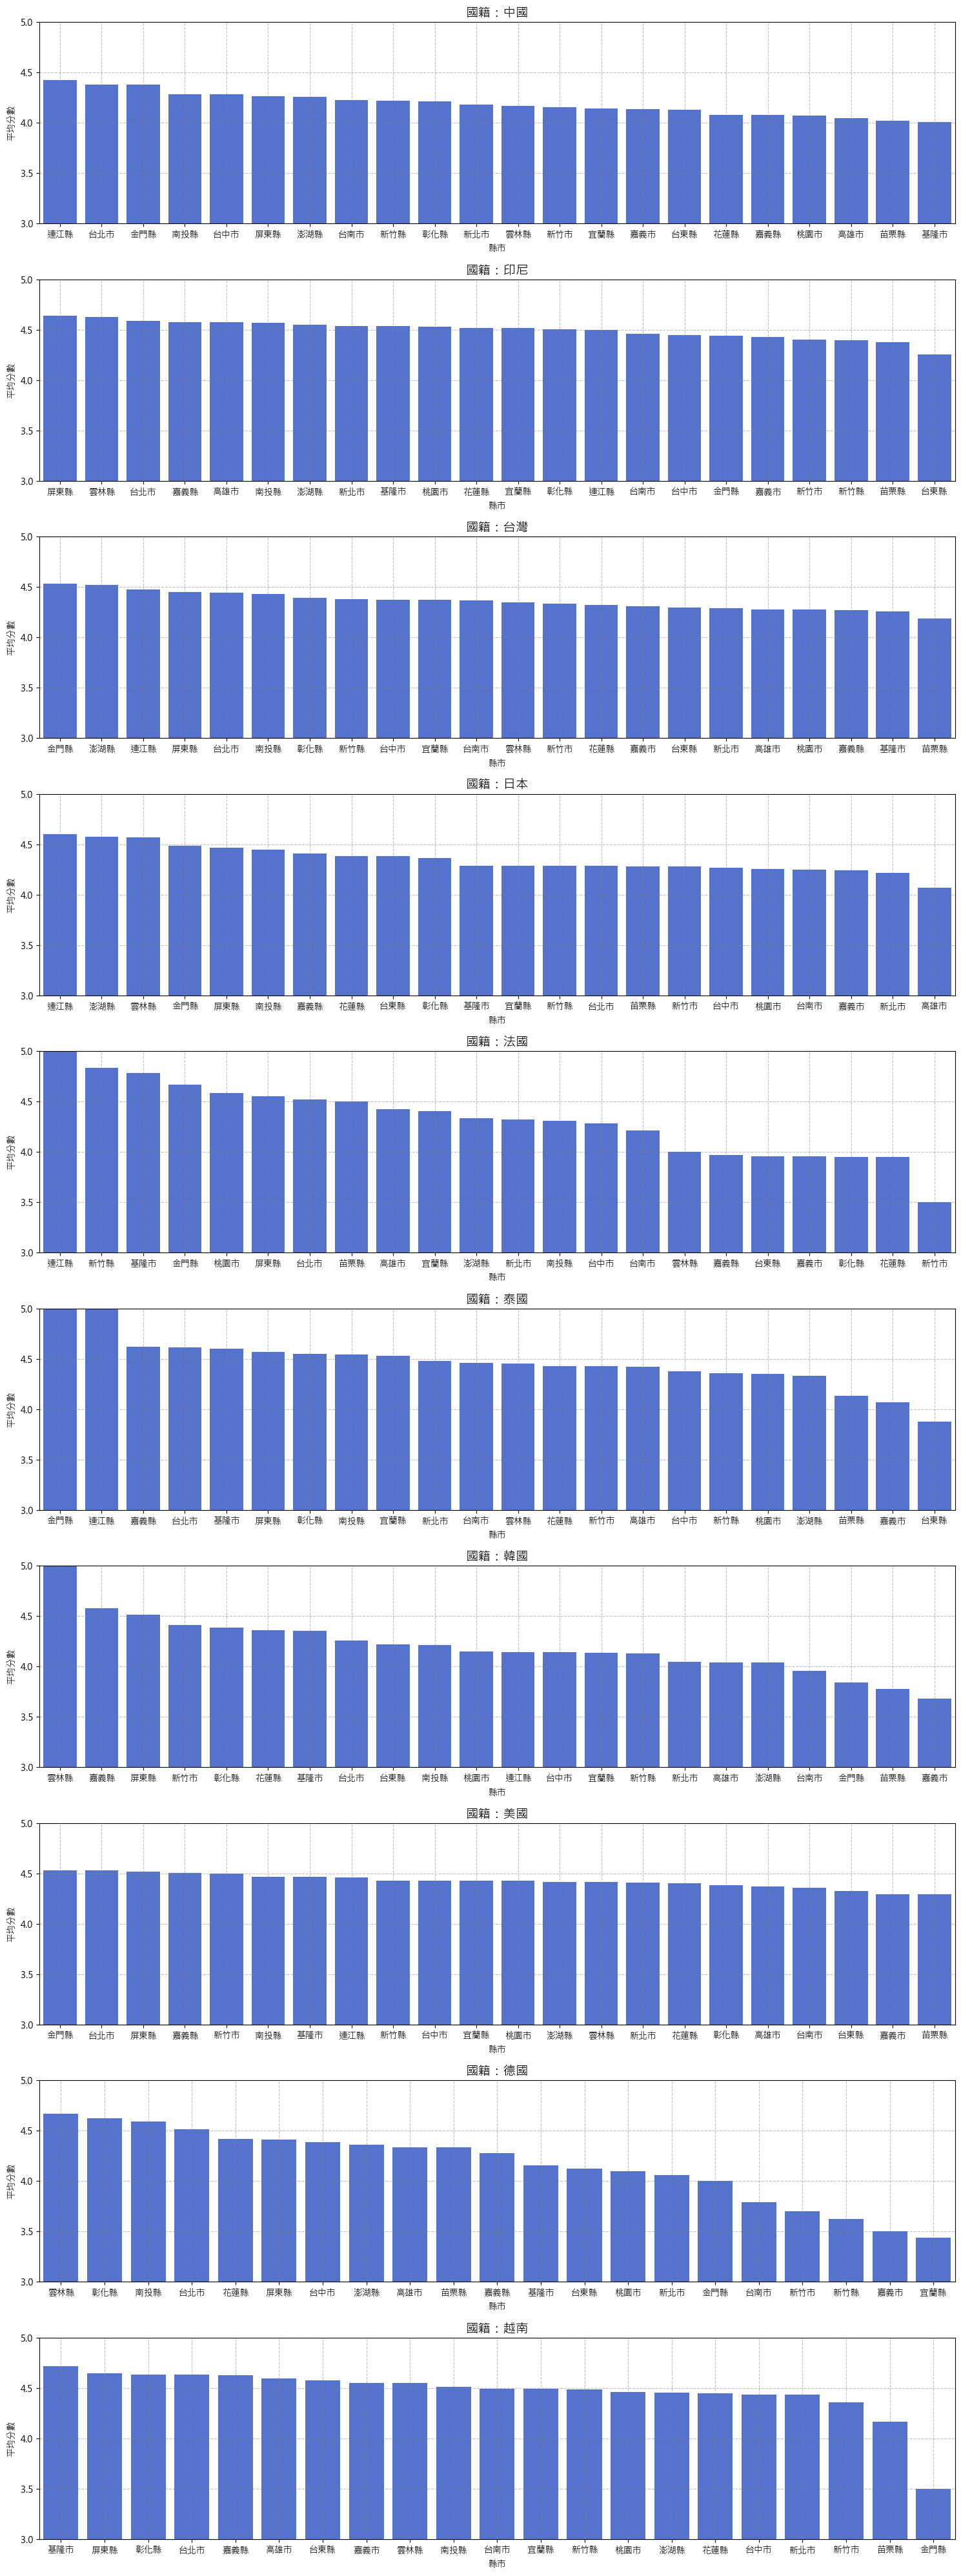

In [14]:
# 各國籍中各類別平均評分 畫圖
languages = top_city_per_nation["language"].value_counts().index

# 設定前n名 設定22為全部縣市
n = 22

# 設定子圖的行數與列數
fig, axes = plt.subplots(nrows=len(languages), ncols=1, figsize=(15, 4 * len(languages)))

# 繪製每個國籍的子圖
for ax, language in zip(axes, languages):
    df_language = top_city_per_nation[top_city_per_nation["language"] == language].sort_values('score',ascending=False).head(n)

    sns.barplot(
        data=df_language,
        x="address",
        y="score",
        ax=ax,
        ci=None,
        color="royalblue"
    )

    ax.set_title(f"國籍：{language}", fontsize=14)
    ax.set_xlabel("縣市")
    ax.set_ylabel("平均分數")
    ax.set_yticks([3.0, 3.5, 4.0, 4.5, 5.0])
    ax.grid(linestyle='--', color='gray', alpha=0.5)
    ax.set_ylim(3.0, 5.0)
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### 國籍縣市平均情感分數

In [15]:
# 國籍縣市平均情感分數
nlp_top_city_per_nation = new_basic_info_rating_838.groupby(["language", "address"])["snownlp_scores_0-100"].mean().groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False)).reset_index()
nlp_top_city_per_nation

language address  snownlp_scores_0-100
0         中國     桃園市             67.195671
1         中國     苗栗縣             60.013260
2         中國     新竹縣             59.241333
3         中國     南投縣             58.445600
4         中國     屏東縣             57.320942
..       ...     ...                   ...
213       韓國     基隆市             43.732057
214       韓國     新竹縣             43.435897
215       韓國     台東縣             42.684564
216       韓國     嘉義市             40.409091
217       韓國     宜蘭縣             39.792683

[218 rows x 3 columns]

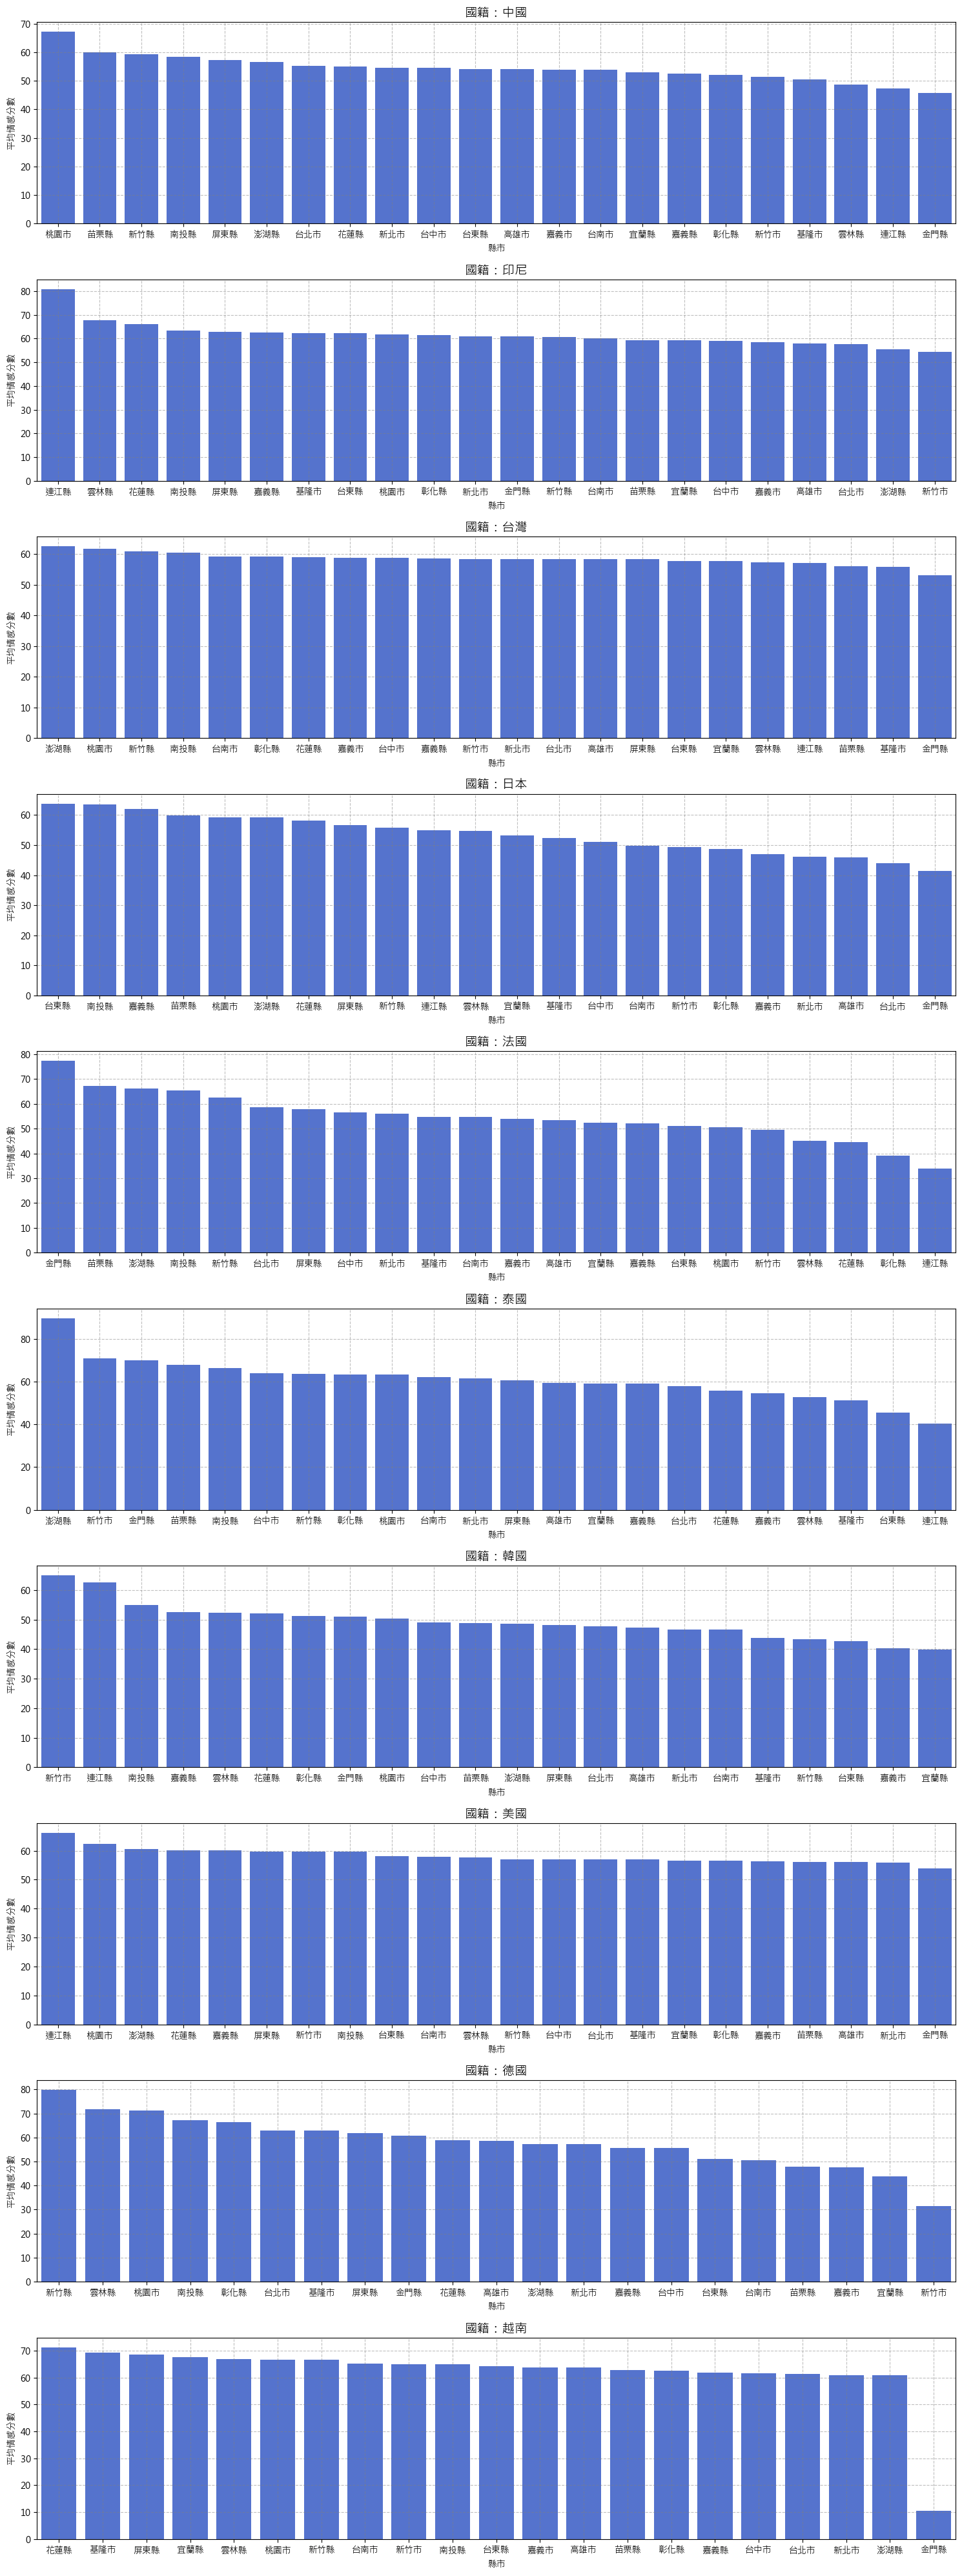

In [16]:
# 各國籍中各類別平均評分 畫圖
languages = nlp_top_city_per_nation["language"].value_counts().index

# 設定前n名 設定22為全部縣市
n = 22

# 設定子圖的行數與列數
fig, axes = plt.subplots(nrows=len(languages), ncols=1, figsize=(15, 4 * len(languages)))

# 繪製每個國籍的子圖
for ax, language in zip(axes, languages):
    df_language = nlp_top_city_per_nation[nlp_top_city_per_nation["language"] == language].sort_values('snownlp_scores_0-100',ascending=False).head(n)

    sns.barplot(
        data=df_language,
        x="address",
        y="snownlp_scores_0-100",
        ax=ax,
        ci=None,
        color="royalblue"
    )

    ax.set_title(f"國籍：{language}", fontsize=14)
    ax.set_xlabel("縣市")
    ax.set_ylabel("平均情感分數")
    # ax.set_yticks([3.0, 3.5, 4.0, 4.5, 5.0])
    ax.grid(linestyle='--', color='gray', alpha=0.5)
    # ax.set_ylim(3.0, 5.0)
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### 各國籍各縣市平均分數與情感分數並列

    language address     score  snownlp_scores_0-100
0         中國     連江縣  4.422680             47.360825
1         中國     台北市  4.382915             55.208171
2         中國     金門縣  4.381579             45.789474
3         中國     南投縣  4.284000             58.445600
4         中國     台中市  4.280995             54.462887
..       ...     ...       ...                   ...
213       韓國     澎湖縣  4.038462             48.692308
214       韓國     台南市  3.958643             46.564157
215       韓國     金門縣  3.842105             51.000000
216       韓國     苗栗縣  3.774194             48.903226
217       韓國     嘉義市  3.681818             40.409091

[218 rows x 4 columns]


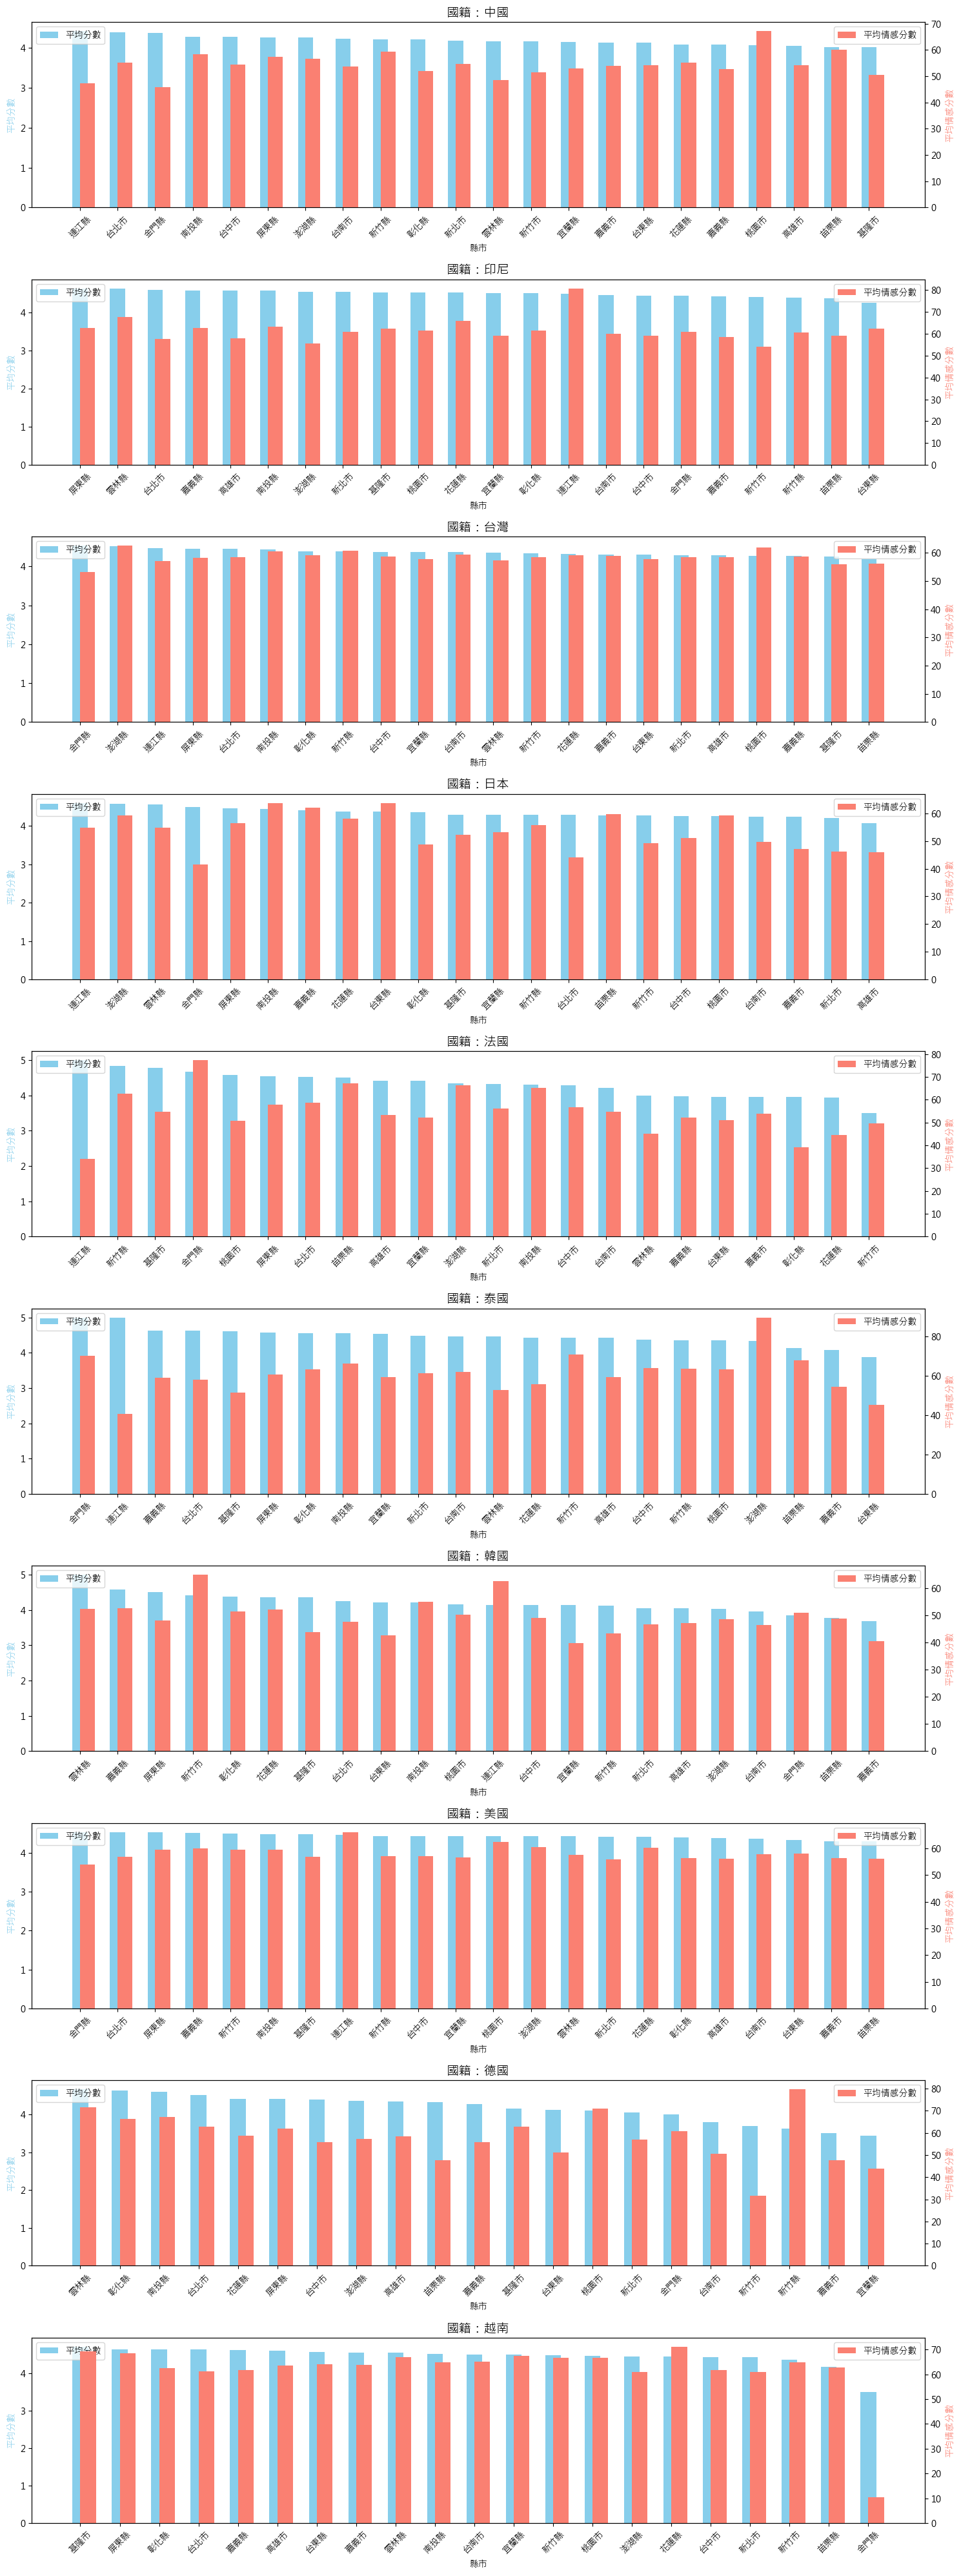

In [17]:
# 合併縣市國籍評分與情感分數
top_city_per_nation_all = pd.merge(top_city_per_nation, nlp_top_city_per_nation)
print(top_city_per_nation_all)

# 各國籍中各縣市平均評分 畫圖
languages = top_city_per_nation_all["language"].value_counts().index

# 設定前n名 設定22為全部縣市
n = 22

# 設定子圖的行數與列數
fig, axes = plt.subplots(nrows=len(languages), ncols=1, figsize=(15, 4 * len(languages)))

# 繪製每個國籍的子圖
for ax, language in zip(axes, languages):
    df_language = top_city_per_nation_all[top_city_per_nation_all["language"] == language].sort_values('score',ascending=False).head(n)
    
    # 設定 X 軸標籤的位置（讓兩個長條並排）
    x_indexes = np.arange(len(df_language))
    
    color='skyblue'
    ax.bar(
        x_indexes,
        df_language["score"],
        width=0.4,
        label="平均分數",
        color=color,
        align = "center"
    )
    ax.set_title(f"國籍：{language}", fontsize=14) 
    ax.set_xlabel("縣市") 
    ax.set_ylabel("平均分數", color=color)    

    # 創建第二個 Y 軸 (右 Y 軸)
    ax2 = ax.twinx()

    
    # 繪製「平均情感分數」的長條圖（右 Y 軸）
    color="salmon"
    ax2.bar(
        x_indexes,
        df_language["snownlp_scores_0-100"],
        width=0.4,
        label="平均情感分數",
        color=color,
        align = "edge"
    )
    ax2.set_ylabel("平均情感分數", color=color)    

    # 設定 X 軸刻度標籤
    ax.set_xticks(x_indexes)
    ax.set_xticklabels(df_language["address"], rotation=45)

    # 設定 Y 軸範圍
    # ax.set_ylim(4.0, 4.8)
    # ax2.set_ylim(42, 68)

    # 顯示圖例
    ax.legend(loc="upper left")
    ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

## 國籍與類別評分

### 依類別畫評分子圖

In [18]:
# 國籍類別平均評分
top_type_per_nation = new_basic_info_rating_838.groupby(["attraction_type", "language"])["score"].mean().groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False)).reset_index()
top_type_per_nation

attraction_type language     score
0             人文歷史       印尼  4.569685
1             人文歷史       泰國  4.532613
2             人文歷史       越南  4.515430
3             人文歷史       美國  4.444732
4             人文歷史       法國  4.385714
5             人文歷史       台灣  4.336378
6             人文歷史       德國  4.282486
7             人文歷史       日本  4.247627
8             人文歷史       中國  4.204521
9             人文歷史       韓國  4.125405
10            城市景觀       越南  4.570781
11            城市景觀       印尼  4.544086
12            城市景觀       泰國  4.439542
13            城市景觀       法國  4.416667
14            城市景觀       美國  4.412413
15            城市景觀       台灣  4.320785
16            城市景觀       德國  4.292308
17            城市景觀       日本  4.196139
18            城市景觀       中國  4.134442
19            城市景觀       韓國  4.097325
20           娛樂與休閒       越南  4.500000
21           娛樂與休閒       印尼  4.497069
22           娛樂與休閒       泰國  4.447598
23           娛樂與休閒       美國  4.429299
24           娛樂與休閒       台灣  4.343759
25           娛樂與休閒       日本  4.327940
26           娛樂與休閒       法國  4.235772
27           娛樂與休閒       德國  4.189873
28           娛樂與休閒       中國  4.172107
29           娛樂與休閒       韓國  4.167157
30            宗教聖地       泰國  4.719527
31            宗教聖地       德國  4.715026
32            宗教聖地       印尼  4.697068
33            宗教聖地       法國  4.691244
34            宗教聖地       越南  4.681818
35            宗教聖地       美國  4.639374
36            宗教聖地       台灣  4.579733
37            宗教聖地       中國  4.520791
38            宗教聖地       日本  4.392632
39            宗教聖地       韓國  4.290076
40         自然景觀與戶外       越南  4.527226
41         自然景觀與戶外       泰國  4.506849
42         自然景觀與戶外       印尼  4.500210
43         自然景觀與戶外       美國  4.498695
44         自然景觀與戶外       日本  4.411091
45         自然景觀與戶外       台灣  4.386797
46         自然景觀與戶外       韓國  4.310629
47         自然景觀與戶外       法國  4.297368
48         自然景觀與戶外       德國  4.239437
49         自然景觀與戶外       中國  4.233861
50           購物與美食       泰國  4.497487
51           購物與美食       印尼  4.484625
52           購物與美食       越南  4.427778
53           購物與美食       美國  4.406915
54           購物與美食       法國  4.404412
55           購物與美食       德國  4.397059
56           購物與美食       台灣  4.223062
57           購物與美食       中國  4.176663
58           購物與美食       日本  4.144737
59           購物與美食       韓國  4.045051

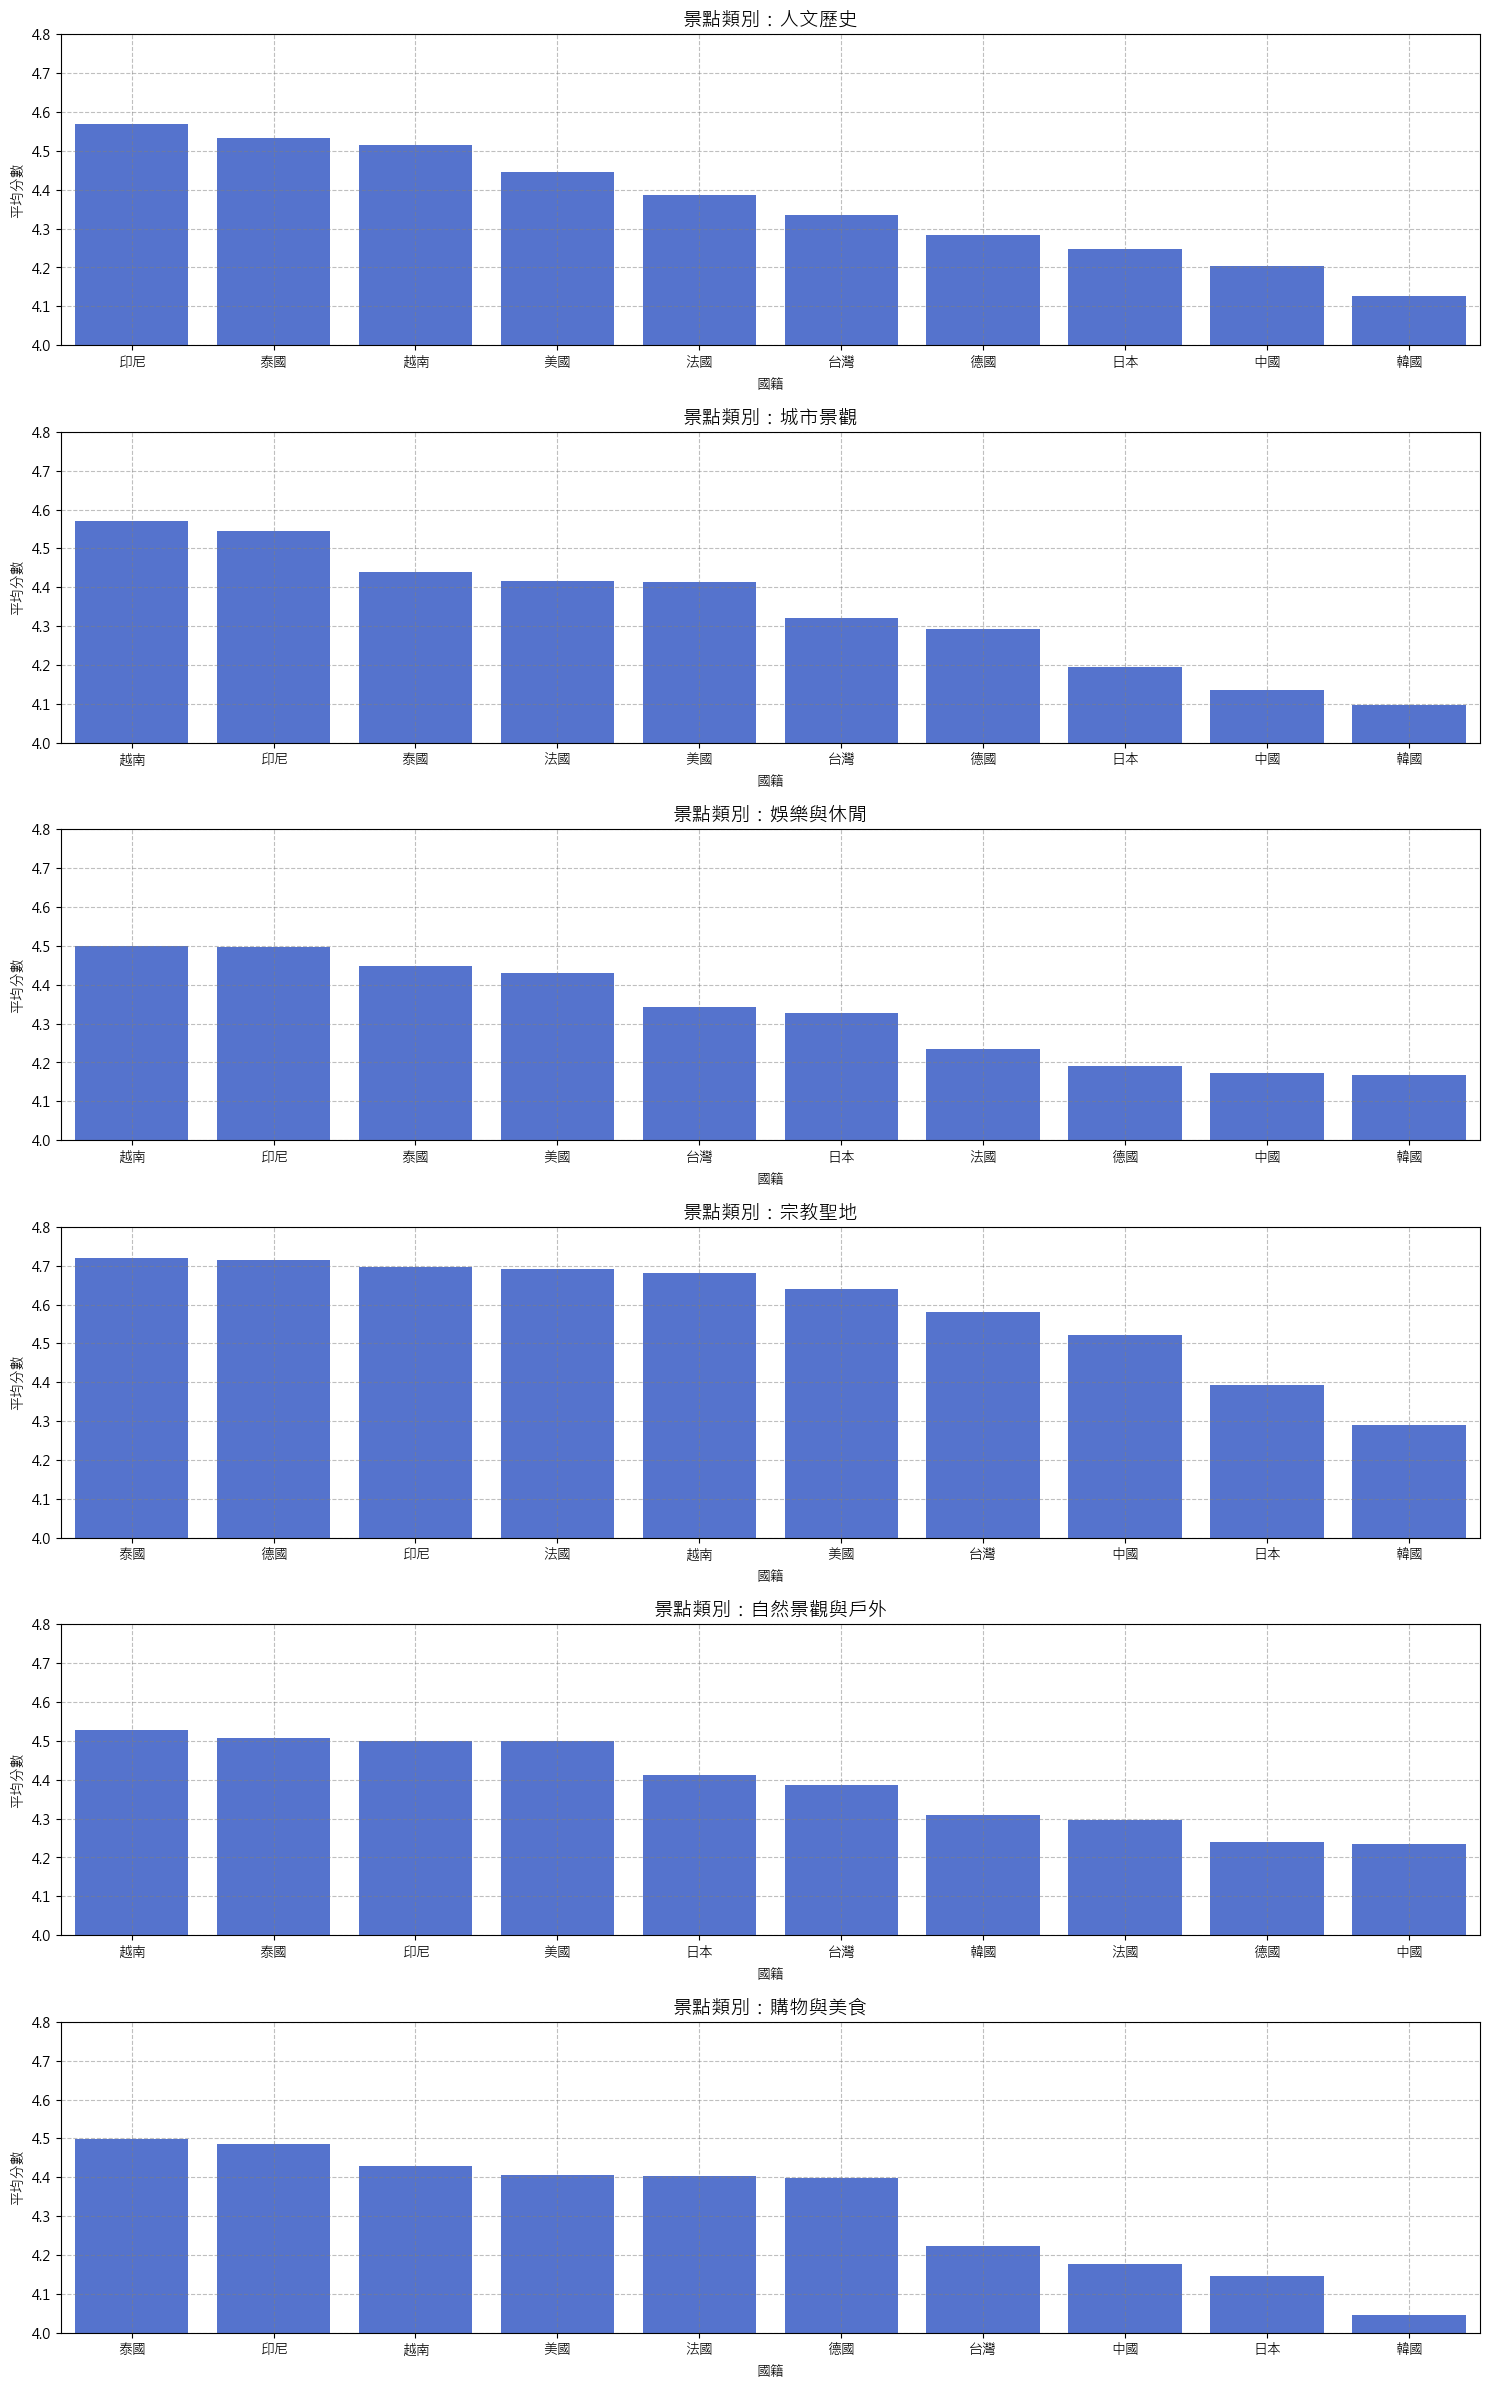

In [19]:
# 各類別中各國籍平均評分畫圖
categories = top_type_per_nation["attraction_type"].unique()
num_categories = len(categories)

# 設定子圖的行數與列數
fig, axes = plt.subplots(nrows=num_categories, ncols=1, figsize=(15, 4 * num_categories))

# 繪製每個地點類別的圖
for ax, category in zip(axes, categories):
    df_category = top_type_per_nation[top_type_per_nation["attraction_type"] == category]

    sns.barplot(
        data=df_category,
        x="language",
        y="score",
        ax=ax,
        ci=None,
        color="royalblue"
    )

    ax.set_title(f"景點類別：{category}", fontsize=14) 
    ax.set_xlabel("國籍") 
    ax.set_ylabel("平均分數") 
    ax.set_yticks([4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8])
    ax.grid(linestyle='--',color='gray', alpha=0.5)
    ax.set_ylim(4.0, 4.8)


plt.tight_layout()
plt.show()

### 依國籍畫評分子圖

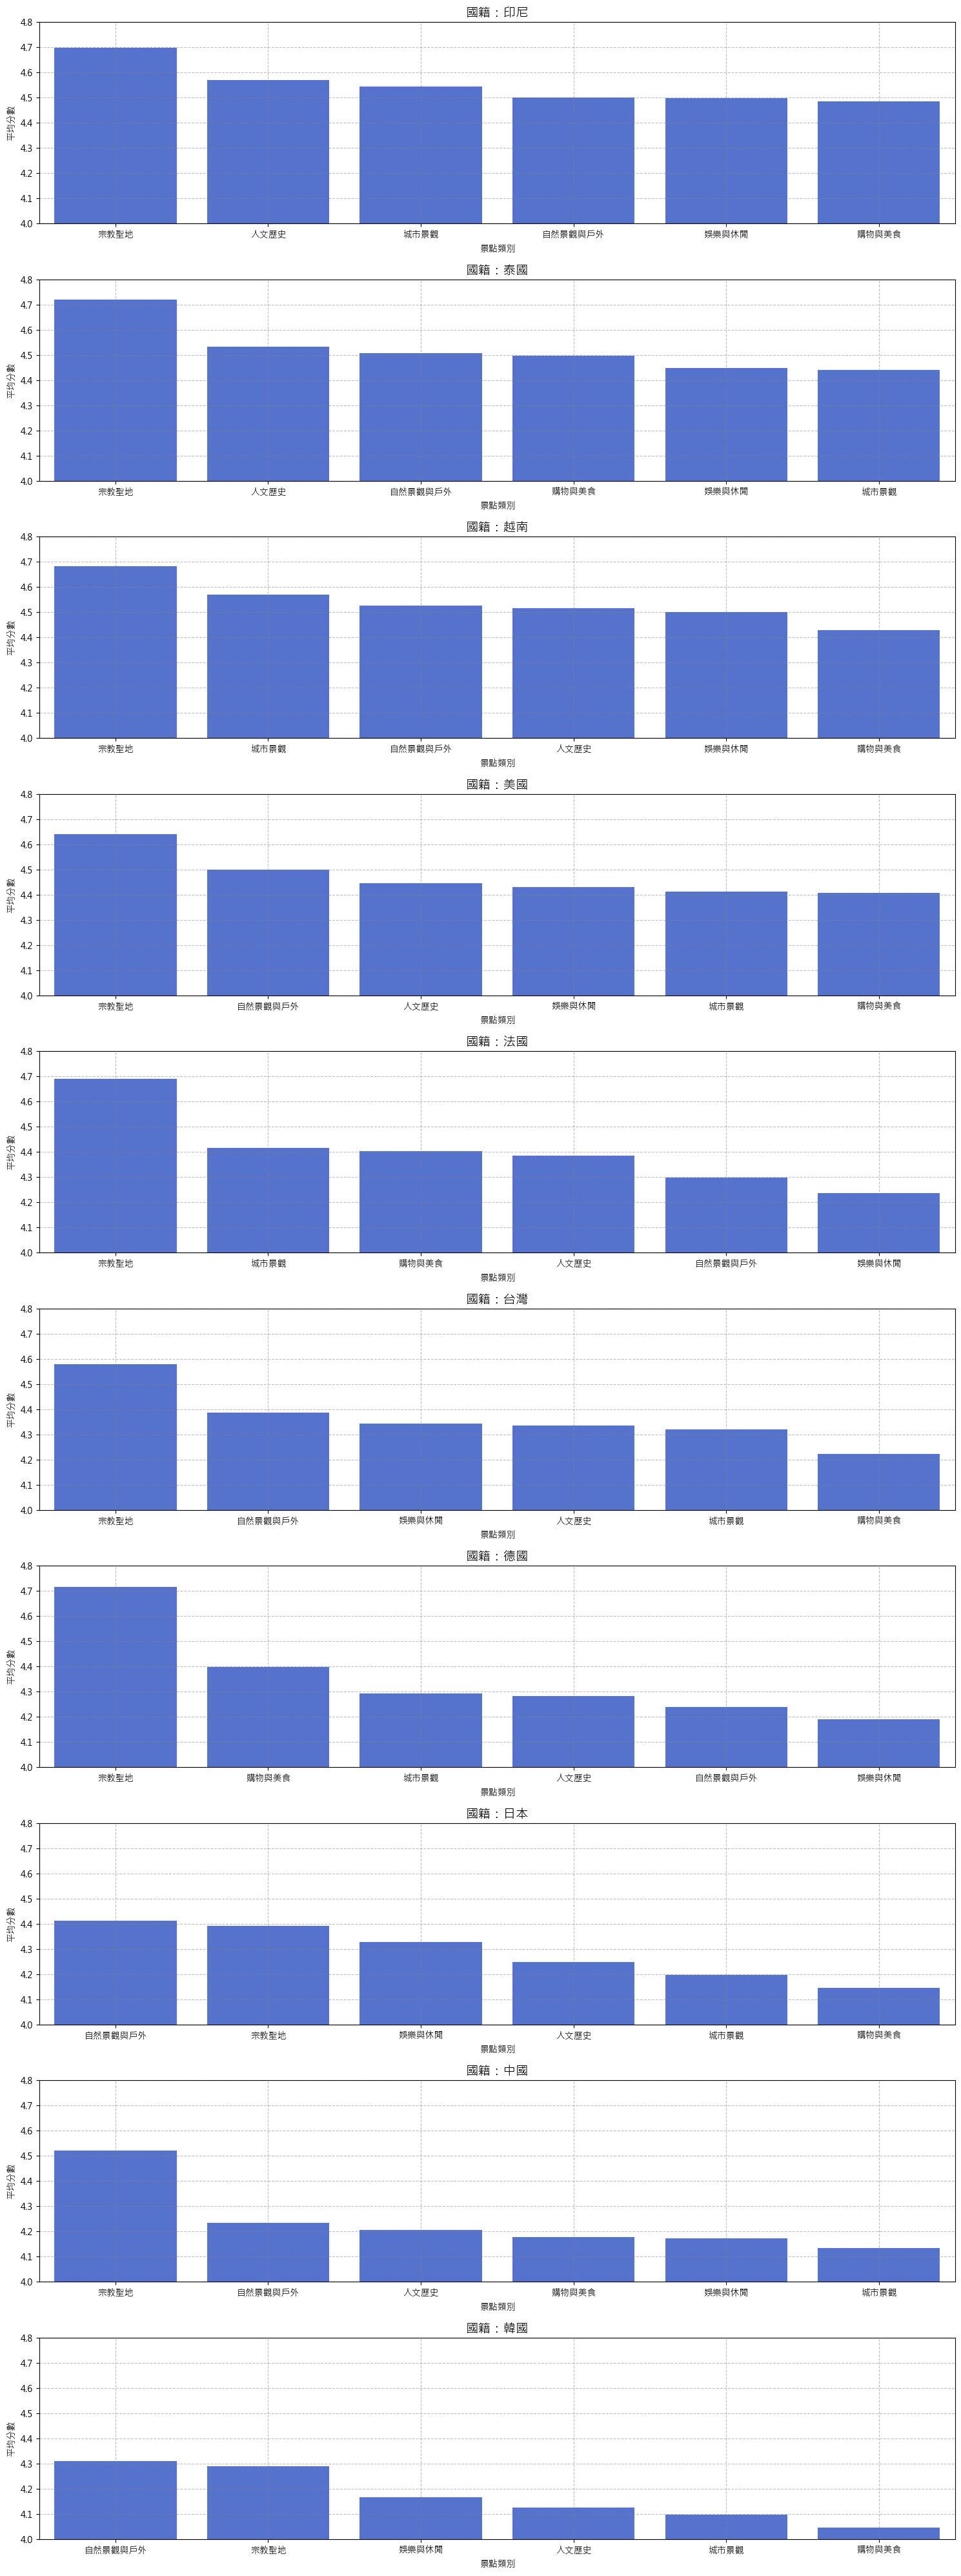

In [20]:
# 各國籍中各類別平均評分 畫圖
languages = top_type_per_nation["language"].value_counts().index

# 設定子圖的行數與列數
fig, axes = plt.subplots(nrows=len(languages), ncols=1, figsize=(15, 4 * len(languages)))

# 繪製每個國籍的子圖
for ax, language in zip(axes, languages):
    df_language = top_type_per_nation[top_type_per_nation["language"] == language].sort_values('score',ascending=False)

    sns.barplot(
        data=df_language,
        x="attraction_type",
        y="score",
        ax=ax,
        ci=None,
        color="royalblue"
    )

    ax.set_title(f"國籍：{language}", fontsize=14)
    ax.set_xlabel("景點類別")
    ax.set_ylabel("平均分數")
    ax.set_yticks([4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8])
    ax.grid(linestyle='--', color='gray', alpha=0.5)
    ax.set_ylim(4.0, 4.8)
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### 依類別畫情感分數子圖

In [21]:
# 國籍類別平均情感分數
nlp_top_type_per_nation = new_basic_info_rating_838.groupby(["attraction_type", "language"])["snownlp_scores_0-100"].mean().groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False)).reset_index()
nlp_top_type_per_nation

attraction_type language  snownlp_scores_0-100
0             人文歷史       越南             60.414512
1             人文歷史       德國             58.320621
2             人文歷史       泰國             58.251640
3             人文歷史       台灣             57.700082
4             人文歷史       印尼             57.518504
5             人文歷史       中國             55.883395
6             人文歷史       法國             55.352041
7             人文歷史       美國             55.191810
8             人文歷史       韓國             45.417139
9             人文歷史       日本             44.384078
10            城市景觀       越南             63.342016
11            城市景觀       泰國             63.024510
12            城市景觀       德國             62.230769
13            城市景觀       法國             60.944444
14            城市景觀       印尼             60.451613
15            城市景觀       美國             59.859219
16            城市景觀       台灣             58.020518
17            城市景觀       中國             52.798561
18            城市景觀       韓國             52.238801
19            城市景觀       日本             51.743145
20           娛樂與休閒       越南             62.658402
21           娛樂與休閒       泰國             62.475983
22           娛樂與休閒       德國             61.240506
23           娛樂與休閒       印尼             60.906213
24           娛樂與休閒       台灣             58.985522
25           娛樂與休閒       美國             57.086457
26           娛樂與休閒       中國             55.859875
27           娛樂與休閒       法國             53.373984
28           娛樂與休閒       日本             51.854369
29           娛樂與休閒       韓國             49.744608
30            宗教聖地       越南             66.841438
31            宗教聖地       德國             64.974093
32            宗教聖地       泰國             62.327811
33            宗教聖地       台灣             61.557816
34            宗教聖地       美國             59.885287
35            宗教聖地       印尼             59.302932
36            宗教聖地       法國             57.889401
37            宗教聖地       中國             57.421950
38            宗教聖地       韓國             51.002672
39            宗教聖地       日本             45.096977
40         自然景觀與戶外       越南             66.707880
41         自然景觀與戶外       印尼             63.593527
42         自然景觀與戶外       泰國             62.300514
43         自然景觀與戶外       美國             62.001141
44         自然景觀與戶外       日本             61.299261
45         自然景觀與戶外       台灣             60.850947
46         自然景觀與戶外       德國             60.842254
47         自然景觀與戶外       法國             59.652632
48         自然景觀與戶外       中國             57.863133
49         自然景觀與戶外       韓國             51.659713
50           購物與美食       越南             57.503333
51           購物與美食       泰國             56.404523
52           購物與美食       台灣             55.156070
53           購物與美食       印尼             54.298893
54           購物與美食       美國             53.828561
55           購物與美食       法國             53.779412
56           購物與美食       德國             53.500000
57           購物與美食       中國             50.167162
58           購物與美食       韓國             46.030774
59           購物與美食       日本             43.092686

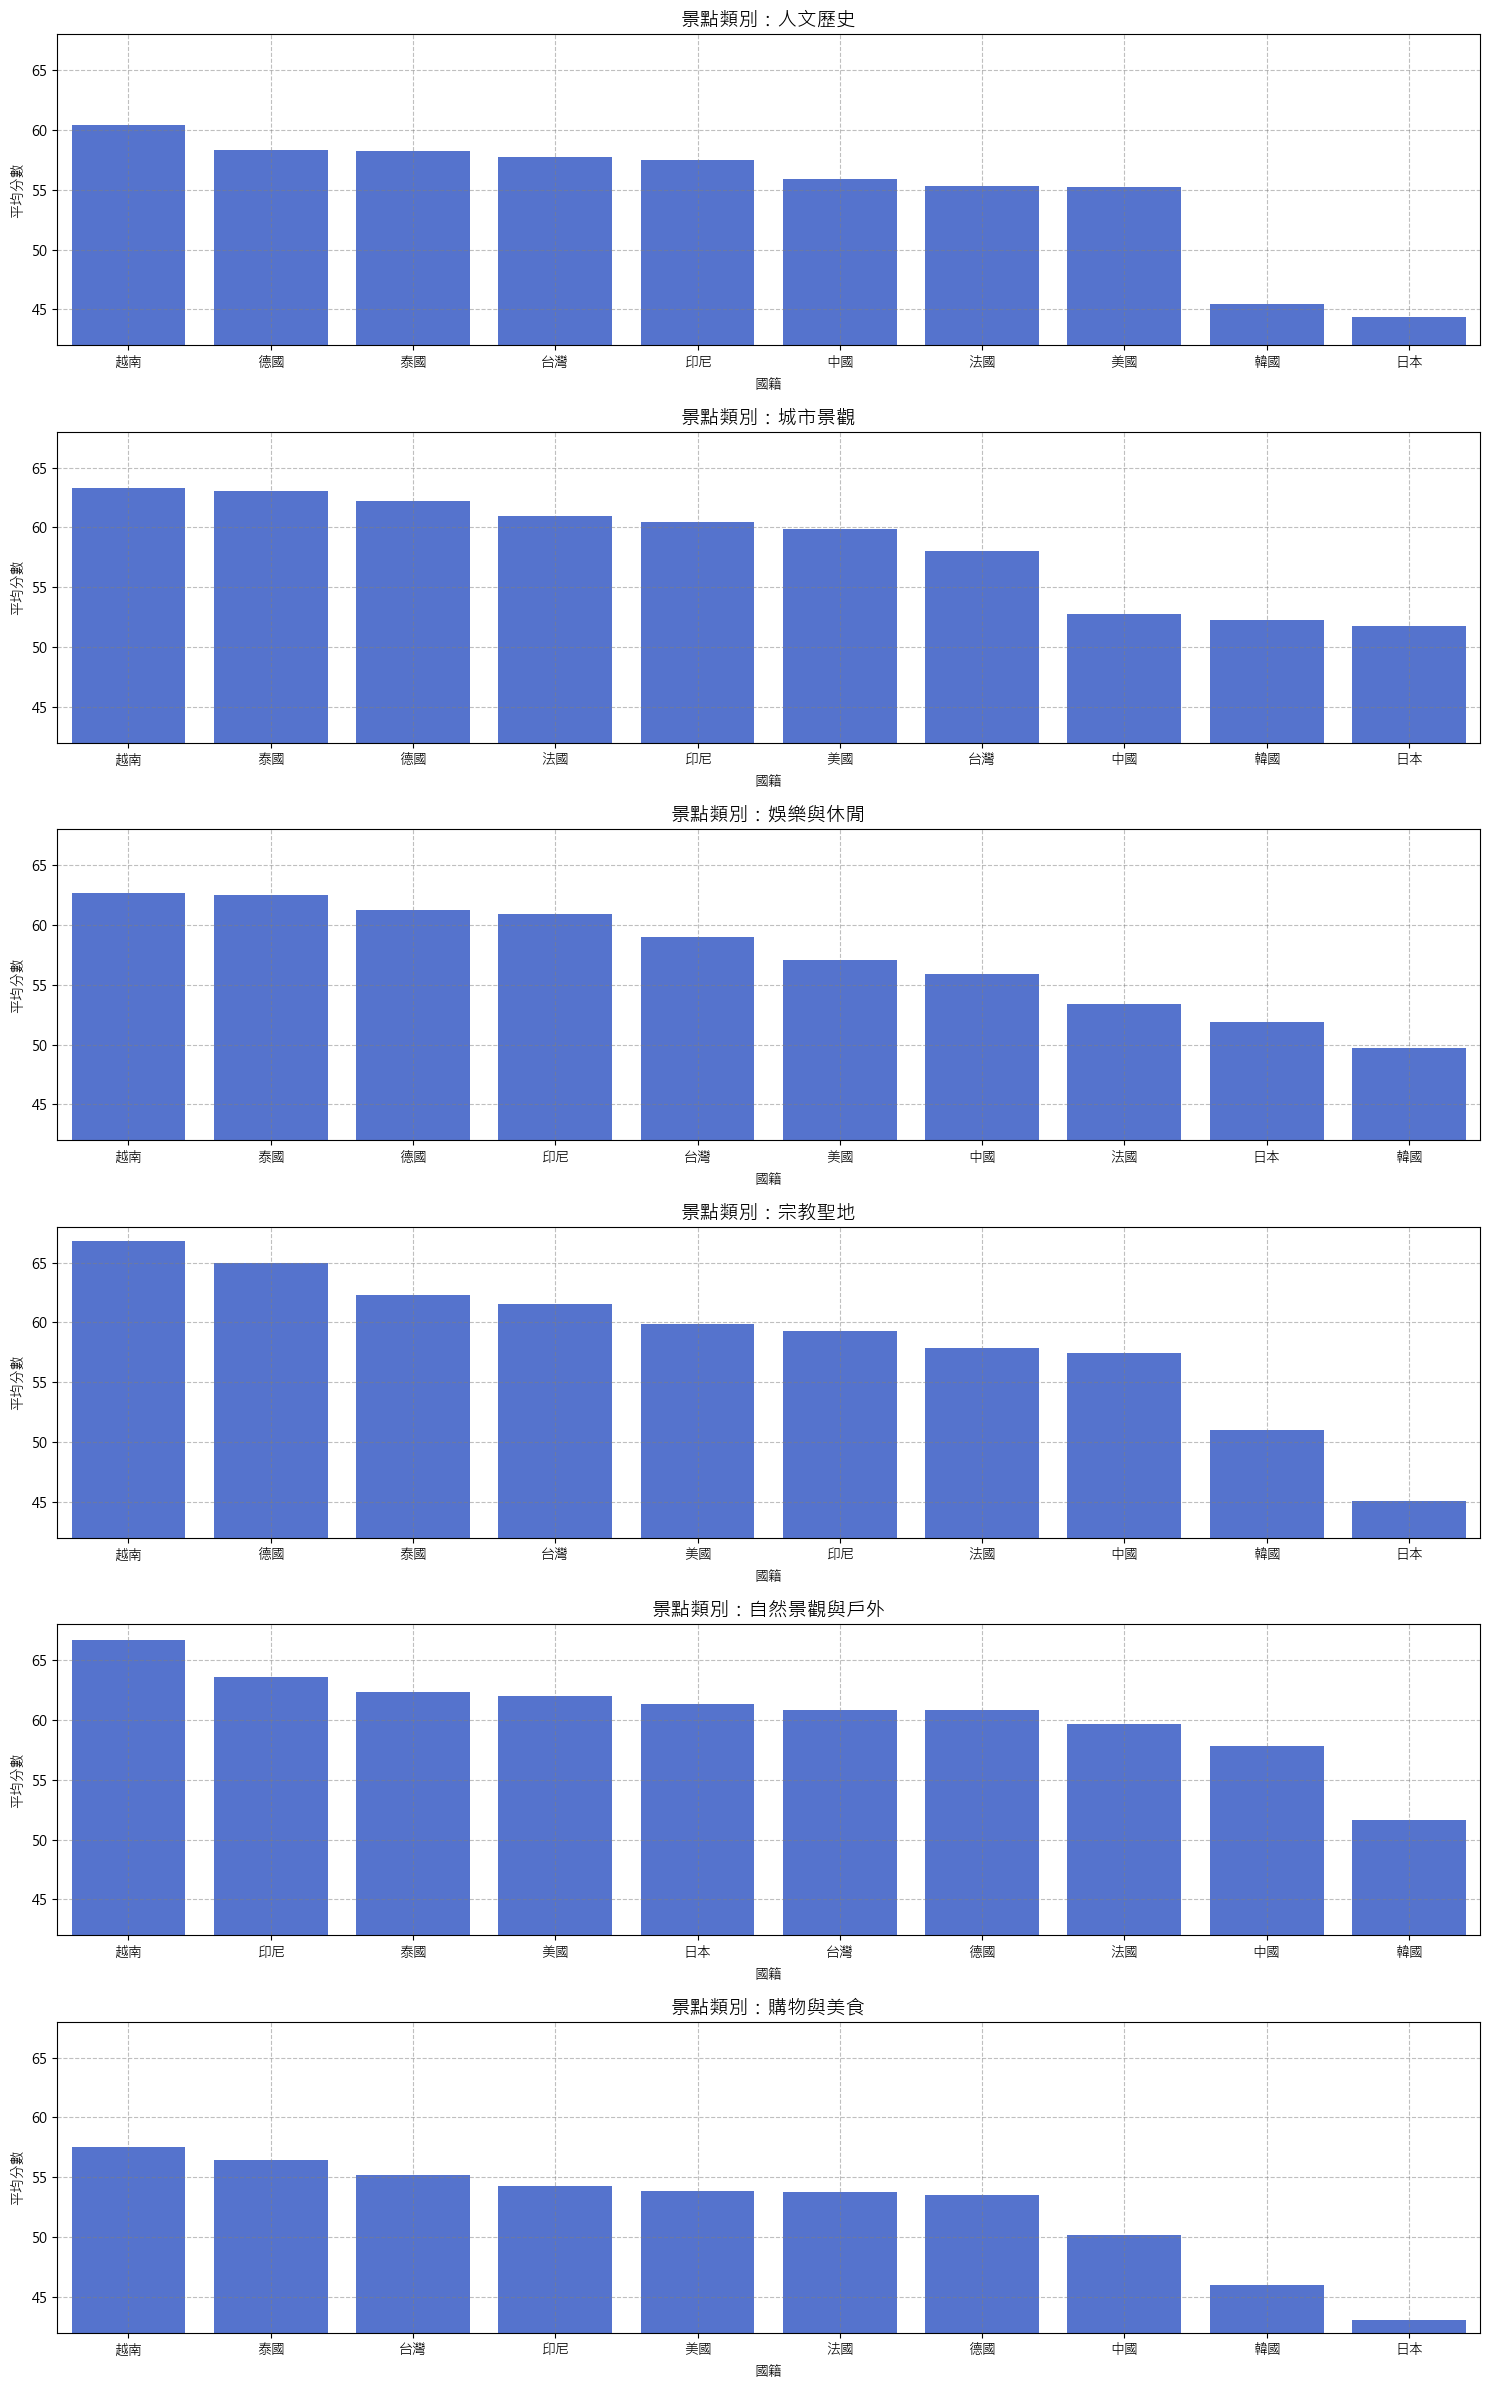

In [22]:
# 類別中各國籍平均情感分數畫圖
categories = nlp_top_type_per_nation["attraction_type"].unique()
num_categories = len(categories)

# 設定子圖的行數與列數
fig, axes = plt.subplots(nrows=num_categories, ncols=1, figsize=(15, 4 * num_categories))

# 繪製每個地點類別的圖
for ax, category in zip(axes, categories):
    df_category = nlp_top_type_per_nation[nlp_top_type_per_nation["attraction_type"] == category]

    sns.barplot(
        data=df_category.sort_values('snownlp_scores_0-100',ascending=False),
        x="language",
        y="snownlp_scores_0-100",
        ax=ax,
        ci=None,
        color="royalblue"
    )

    ax.set_title(f"景點類別：{category}", fontsize=14) 
    ax.set_xlabel("國籍") 
    ax.set_ylabel("平均分數") 
    ax.grid(linestyle='--',color='gray', alpha=0.5)
    ax.set_ylim(42, 68)


plt.tight_layout()
plt.show()

### 依國籍畫情感分數子圖

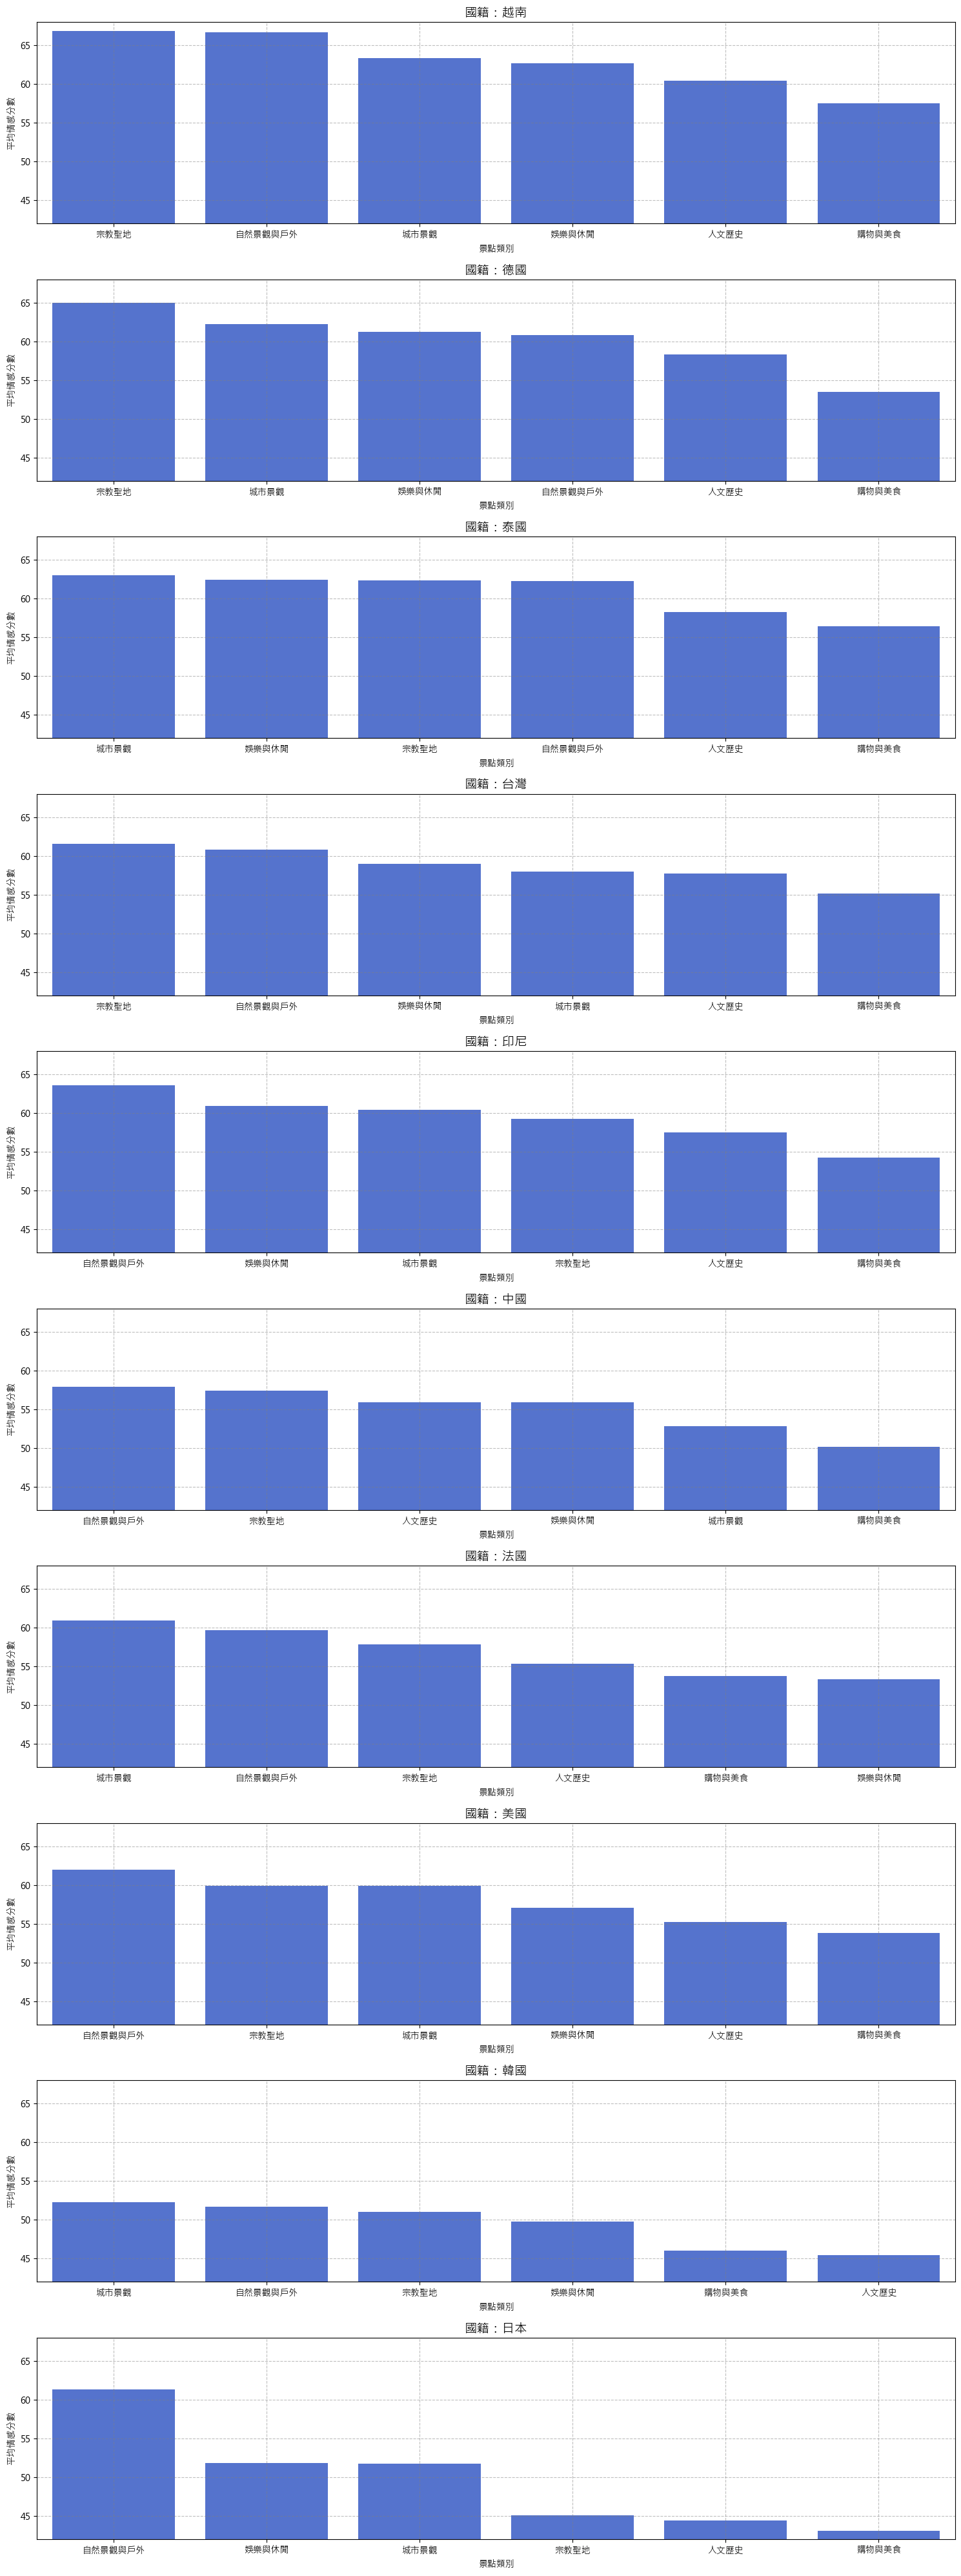

In [23]:
# 各國籍中各類別平均評分 畫圖
languages = nlp_top_type_per_nation["language"].value_counts().sort_values(ascending=False).index

# 設定子圖的行數與列數
fig, axes = plt.subplots(nrows=len(languages), ncols=1, figsize=(15, 4 * len(languages)))

# 繪製每個國籍的子圖
for ax, language in zip(axes, languages):
    df_language = nlp_top_type_per_nation[nlp_top_type_per_nation["language"] == language]

    sns.barplot(
        data=df_language.sort_values('snownlp_scores_0-100',ascending=False),
        x="attraction_type",
        y="snownlp_scores_0-100",
        ax=ax,
        ci=None,
        color="royalblue"
    )

    ax.set_title(f"國籍：{language}", fontsize=14)
    ax.set_xlabel("景點類別")
    ax.set_ylabel("平均情感分數")
    ax.grid(linestyle='--', color='gray', alpha=0.5)
    ax.set_ylim(42, 68)
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### 依類別並列評分與情感分數

In [24]:
# 合併評分與情感分數
top_type_per_nation_merged = pd.merge(top_type_per_nation,nlp_top_type_per_nation)
top_type_per_nation_merged

attraction_type language     score  snownlp_scores_0-100
0             人文歷史       印尼  4.569685             57.518504
1             人文歷史       泰國  4.532613             58.251640
2             人文歷史       越南  4.515430             60.414512
3             人文歷史       美國  4.444732             55.191810
4             人文歷史       法國  4.385714             55.352041
5             人文歷史       台灣  4.336378             57.700082
6             人文歷史       德國  4.282486             58.320621
7             人文歷史       日本  4.247627             44.384078
8             人文歷史       中國  4.204521             55.883395
9             人文歷史       韓國  4.125405             45.417139
10            城市景觀       越南  4.570781             63.342016
11            城市景觀       印尼  4.544086             60.451613
12            城市景觀       泰國  4.439542             63.024510
13            城市景觀       法國  4.416667             60.944444
14            城市景觀       美國  4.412413             59.859219
15            城市景觀       台灣  4.320785             58.020518
16            城市景觀       德國  4.292308             62.230769
17            城市景觀       日本  4.196139             51.743145
18            城市景觀       中國  4.134442             52.798561
19            城市景觀       韓國  4.097325             52.238801
20           娛樂與休閒       越南  4.500000             62.658402
21           娛樂與休閒       印尼  4.497069             60.906213
22           娛樂與休閒       泰國  4.447598             62.475983
23           娛樂與休閒       美國  4.429299             57.086457
24           娛樂與休閒       台灣  4.343759             58.985522
25           娛樂與休閒       日本  4.327940             51.854369
26           娛樂與休閒       法國  4.235772             53.373984
27           娛樂與休閒       德國  4.189873             61.240506
28           娛樂與休閒       中國  4.172107             55.859875
29           娛樂與休閒       韓國  4.167157             49.744608
30            宗教聖地       泰國  4.719527             62.327811
31            宗教聖地       德國  4.715026             64.974093
32            宗教聖地       印尼  4.697068             59.302932
33            宗教聖地       法國  4.691244             57.889401
34            宗教聖地       越南  4.681818             66.841438
35            宗教聖地       美國  4.639374             59.885287
36            宗教聖地       台灣  4.579733             61.557816
37            宗教聖地       中國  4.520791             57.421950
38            宗教聖地       日本  4.392632             45.096977
39            宗教聖地       韓國  4.290076             51.002672
40         自然景觀與戶外       越南  4.527226             66.707880
41         自然景觀與戶外       泰國  4.506849             62.300514
42         自然景觀與戶外       印尼  4.500210             63.593527
43         自然景觀與戶外       美國  4.498695             62.001141
44         自然景觀與戶外       日本  4.411091             61.299261
45         自然景觀與戶外       台灣  4.386797             60.850947
46         自然景觀與戶外       韓國  4.310629             51.659713
47         自然景觀與戶外       法國  4.297368             59.652632
48         自然景觀與戶外       德國  4.239437             60.842254
49         自然景觀與戶外       中國  4.233861             57.863133
50           購物與美食       泰國  4.497487             56.404523
51           購物與美食       印尼  4.484625             54.298893
52           購物與美食       越南  4.427778             57.503333
53           購物與美食       美國  4.406915             53.828561
54           購物與美食       法國  4.404412             53.779412
55           購物與美食       德國  4.397059             53.500000
56           購物與美食       台灣  4.223062             55.156070
57           購物與美食       中國  4.176663             50.167162
58           購物與美食       日本  4.144737             43.092686
59           購物與美食       韓國  4.045051             46.030774

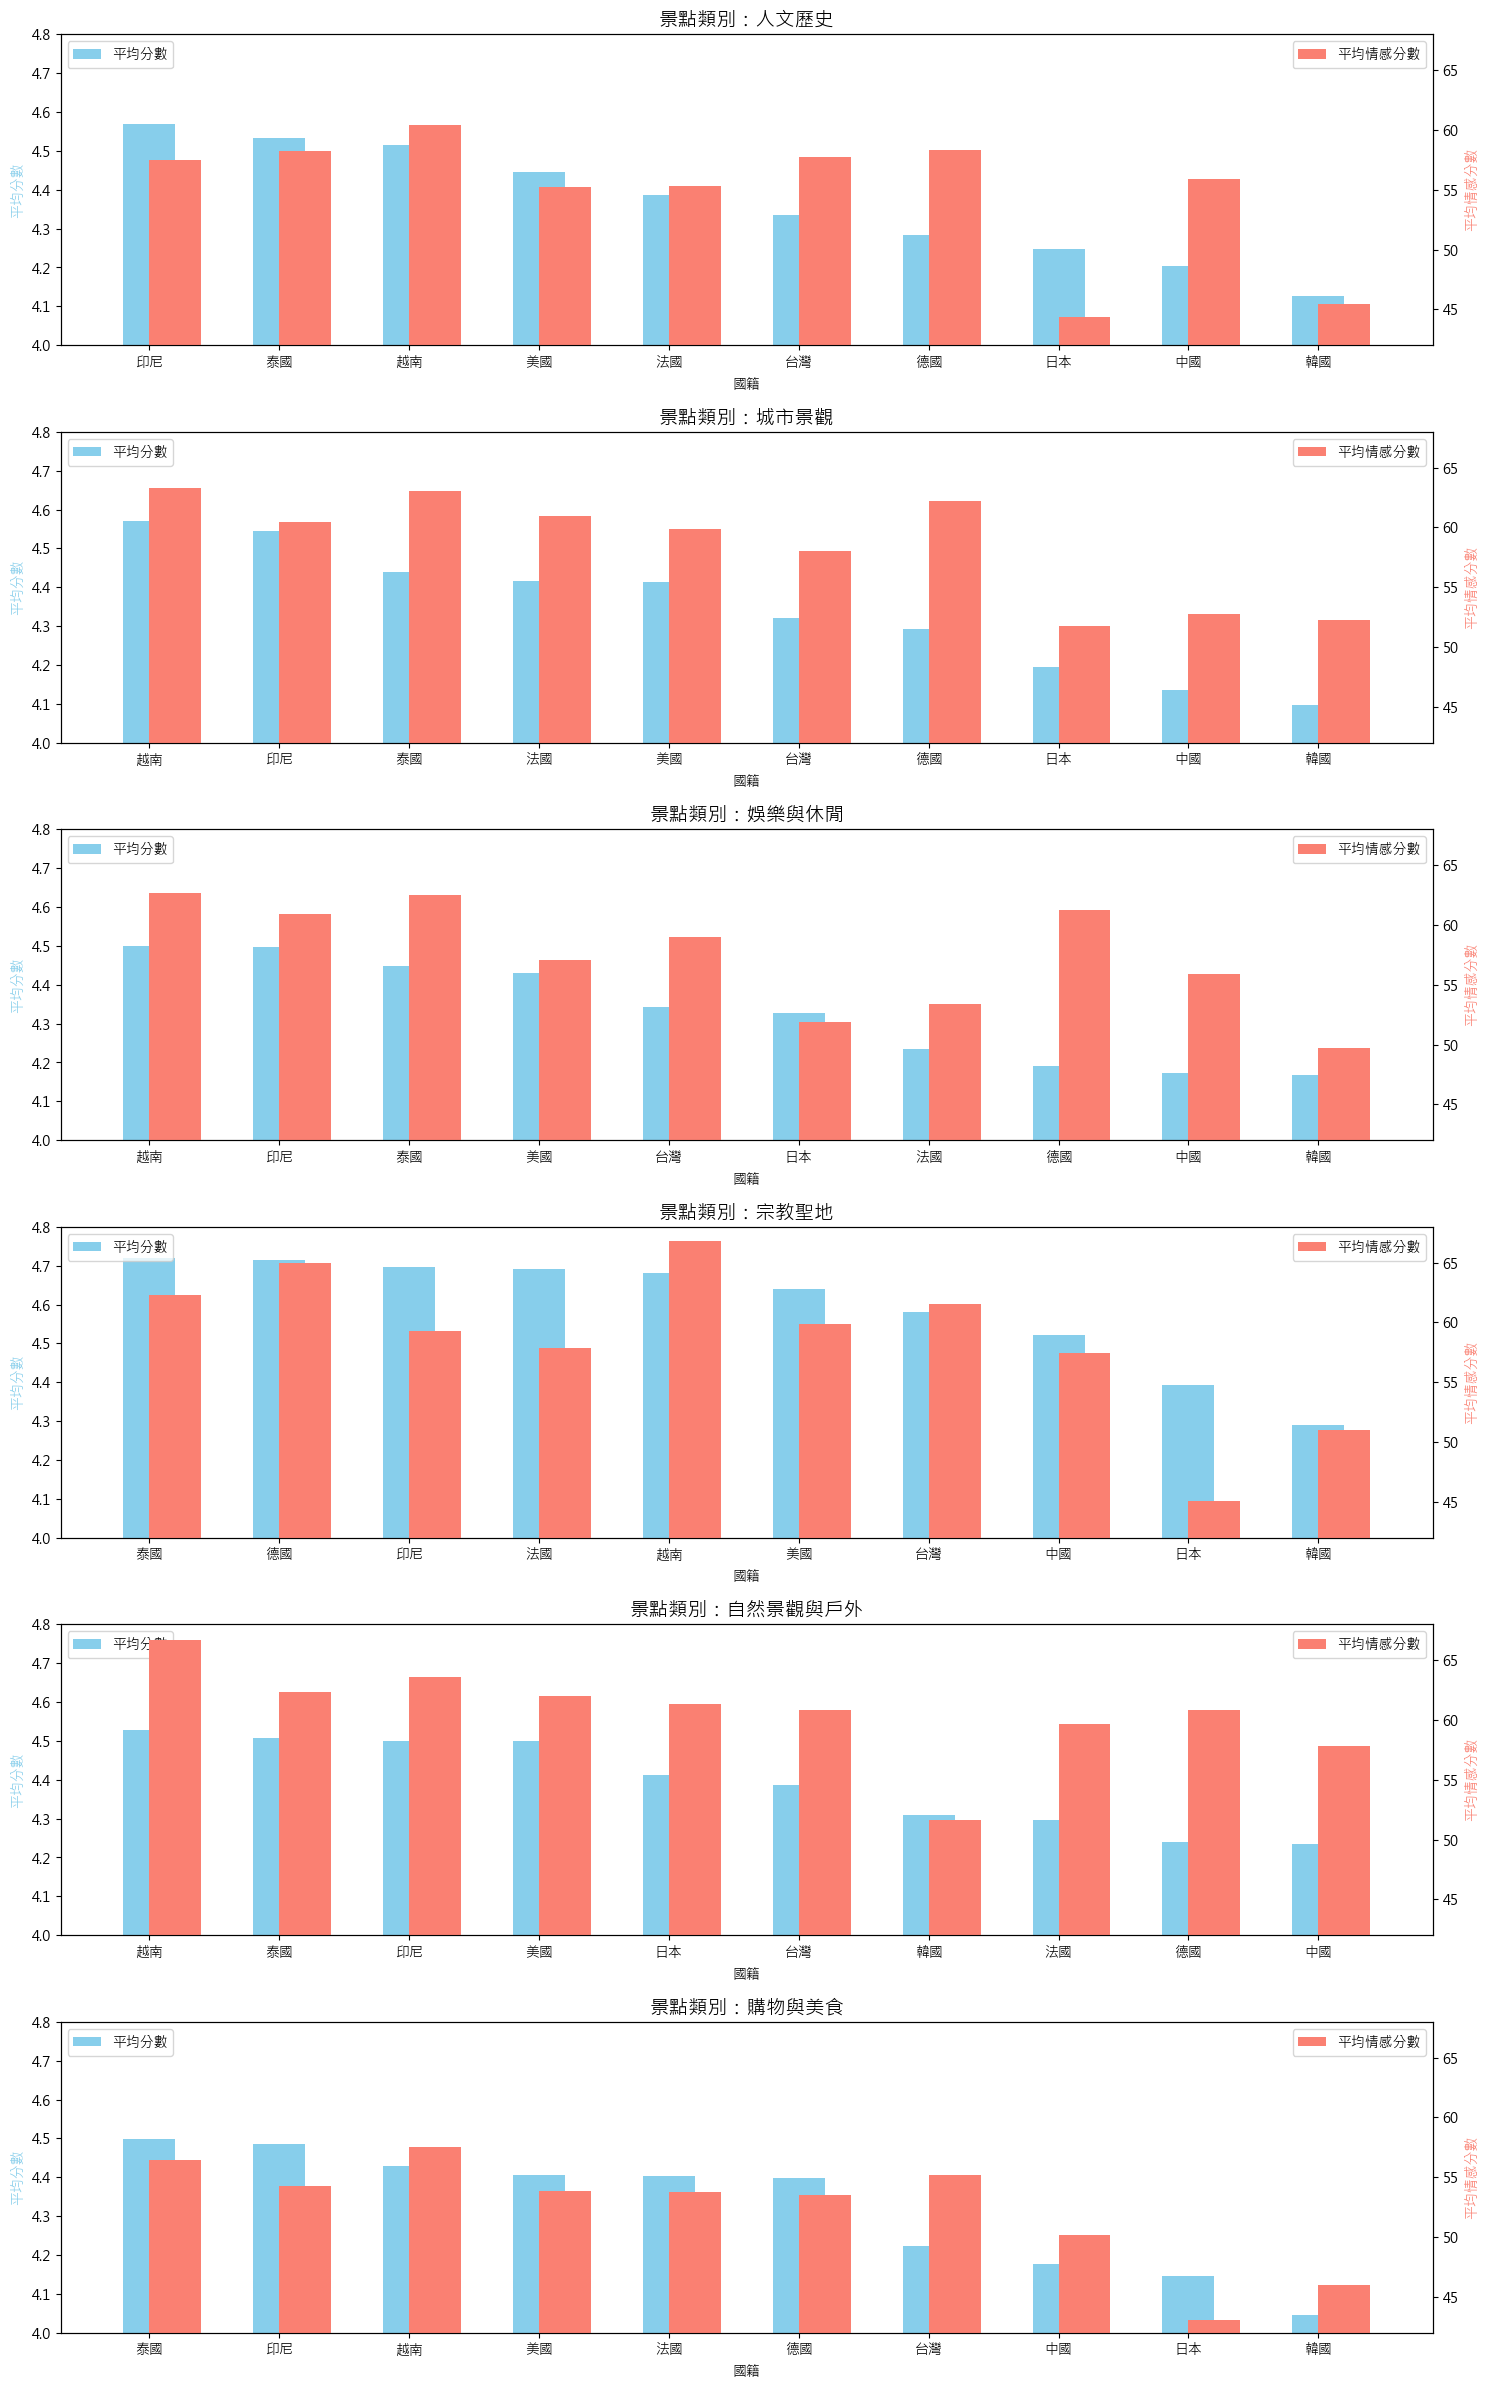

In [25]:
# 獲取地點類別
categories = top_type_per_nation_merged["attraction_type"].unique()
num_categories = len(categories)

# 設定子圖的行數與列數
fig, axes = plt.subplots(nrows=num_categories, ncols=1, figsize=(15, 4 * num_categories))

# 繪製每個地點類別的圖
for ax, category in zip(axes, categories):
    df_category = top_type_per_nation_merged[top_type_per_nation_merged["attraction_type"] == category].sort_values('score',ascending=False)

    # 設定 X 軸標籤的位置（讓兩個長條並排）
    x_indexes = np.arange(len(df_category))

    color = "skyblue"
    # 繪製「平均分數」的長條圖（左側 Y 軸）
    ax.bar(
        x_indexes,  # 往左偏移
        df_category["score"],
        width=0.4,
        label="平均分數",
        color=color,
        align = "center"
    )
    ax.set_title(f"景點類別：{category}", fontsize=14) 
    ax.set_xlabel("國籍") 
    ax.set_ylabel("平均分數", color=color)

    # 創建第二個 Y 軸 (右 Y 軸)
    ax2 = ax.twinx()

    color = "salmon"
    # 繪製「平均情感分數」的長條圖（右 Y 軸）
    ax2.bar(
        x_indexes,
        df_category["snownlp_scores_0-100"],
        width=0.4,
        label="平均情感分數",
        color=color,
        align = "edge"
    )

    # 設定標題與 X/Y 軸標籤
    ax2.set_ylabel("平均情感分數", color=color)  

    # 設定 X 軸刻度標籤
    ax.set_xticks(x_indexes)
    ax.set_xticklabels(df_category["language"], rotation=0)

    # 設定 Y 軸範圍
    ax.set_ylim(4.0, 4.8)
    ax2.set_ylim(42, 68)

    # 顯示圖例
    ax.legend(loc="upper left")
    ax2.legend(loc="upper right")

# 調整子圖間距
plt.tight_layout()
plt.show()

### 依國籍並列評分與情感分數

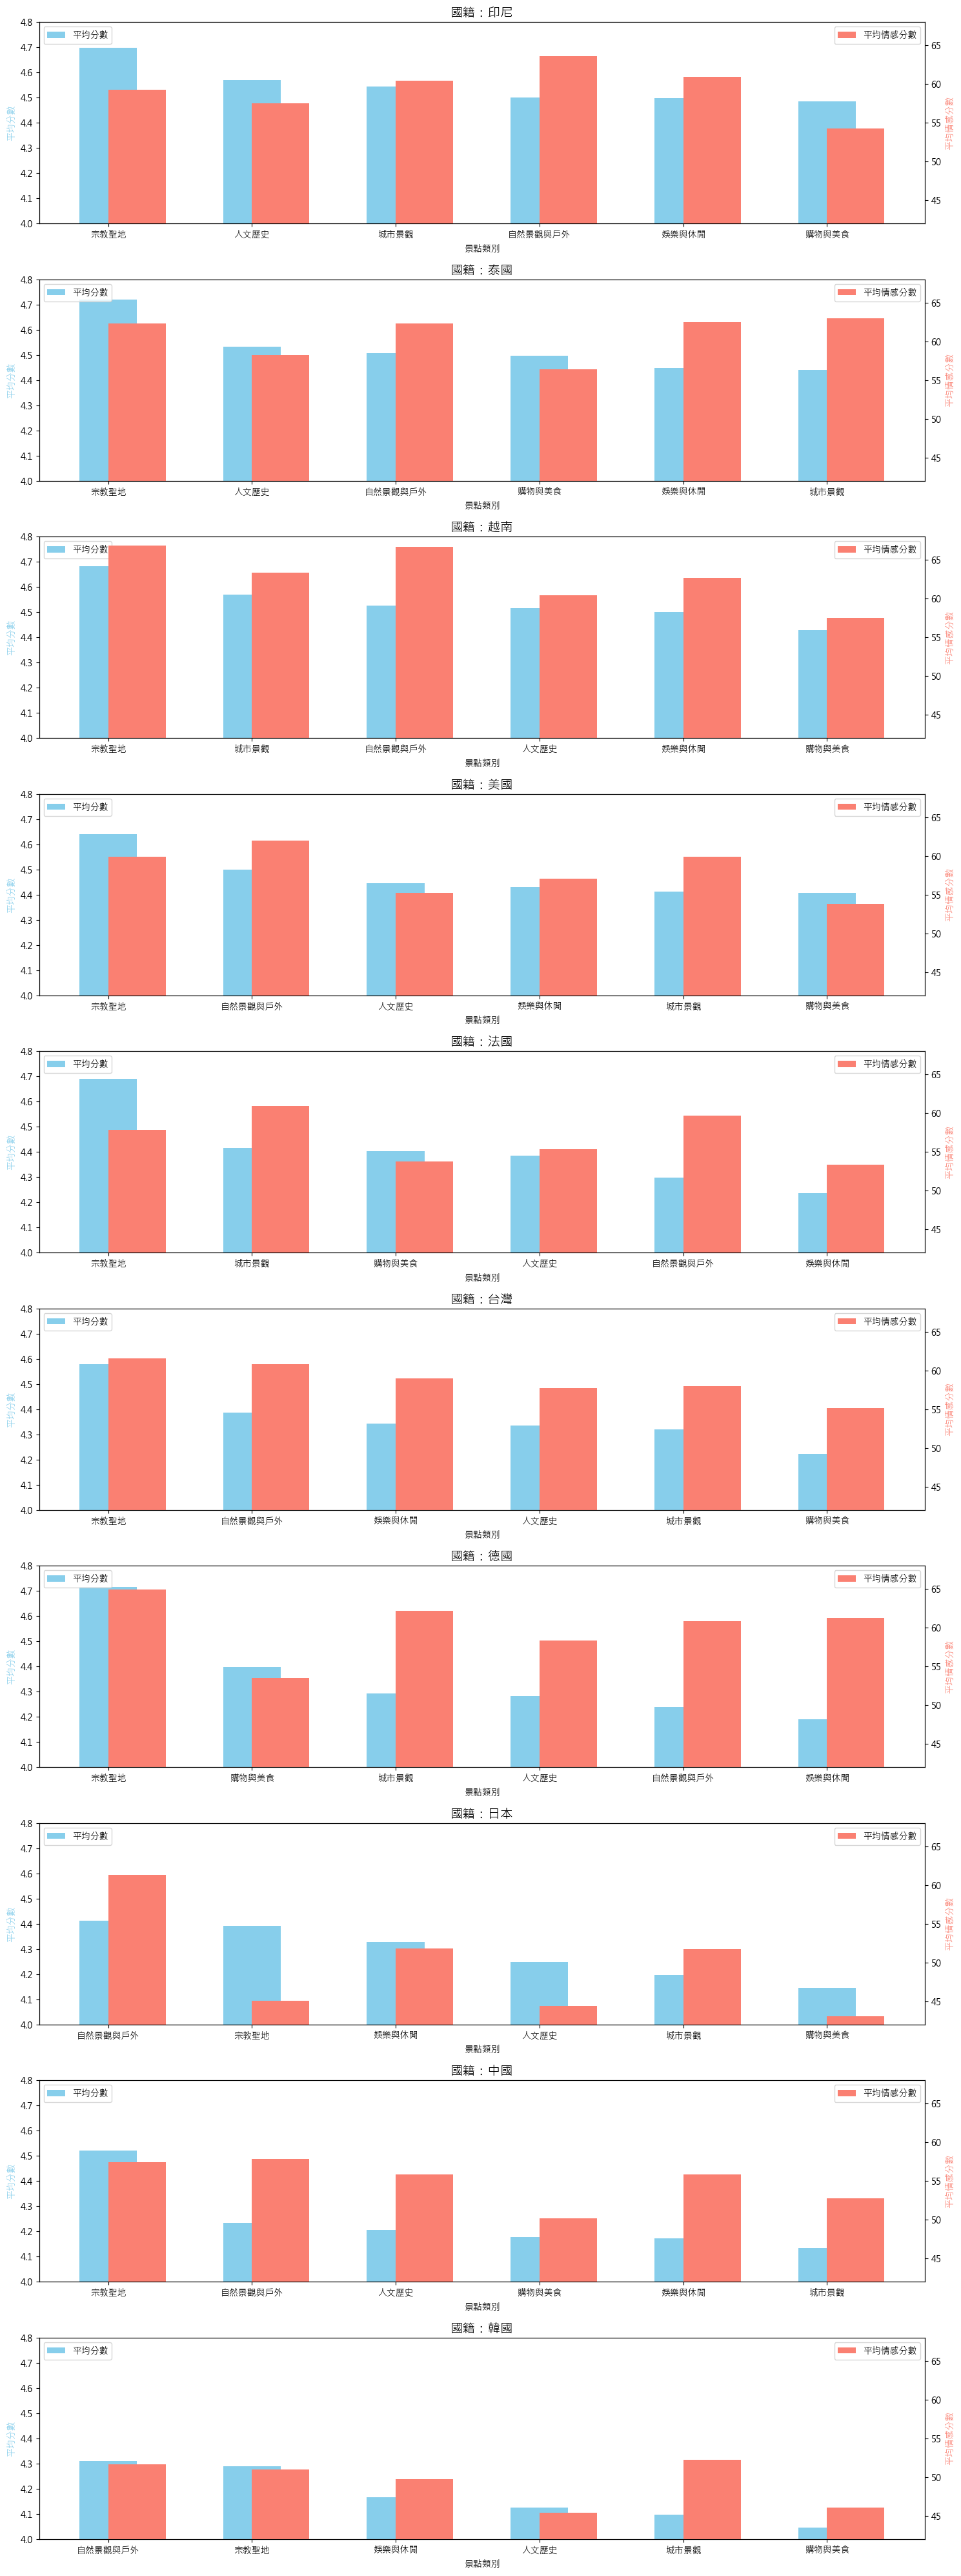

In [26]:
# 獲取國籍
languages = top_type_per_nation_merged["language"].unique()
num_languages = len(languages)

# 設定子圖的行數與列數
fig, axes = plt.subplots(nrows=num_languages, ncols=1, figsize=(15, 4 * num_languages))

# 繪製每個地點類別的圖
for ax, language in zip(axes, languages):
    df_language = top_type_per_nation_merged[top_type_per_nation_merged["language"] == language].sort_values('score',ascending=False)

    # 設定 X 軸標籤的位置（讓兩個長條並排）
    x_indexes = np.arange(len(df_language))

    color = "skyblue"
    # 繪製「平均分數」的長條圖（左側 Y 軸）
    ax.bar(
        x_indexes,  # 往左偏移
        df_language["score"],
        width=0.4,
        label="平均分數",
        color=color,
        align = "center"
    )
    ax.set_title(f"國籍：{language}", fontsize=14) 
    ax.set_xlabel("景點類別") 
    ax.set_ylabel("平均分數", color=color)

    # 創建第二個 Y 軸 (右 Y 軸)
    ax2 = ax.twinx()

    color = "salmon"
    # 繪製「平均情感分數」的長條圖（右 Y 軸）
    ax2.bar(
        x_indexes,
        df_language["snownlp_scores_0-100"],
        width=0.4,
        label="平均情感分數",
        color=color,
        align = "edge"
    )

    # 設定標題與 X/Y 軸標籤

    ax2.set_ylabel("平均情感分數", color=color)  

    # 設定 X 軸刻度標籤
    ax.set_xticks(x_indexes)
    ax.set_xticklabels(df_language["attraction_type"], rotation=0)  # 旋轉標籤避免重疊

    # 設定 Y 軸範圍
    ax.set_ylim(4.0, 4.8)
    ax2.set_ylim(42, 68)  # 依據「情感分數」的範圍調整

    # 顯示圖例
    ax.legend(loc="upper left")
    ax2.legend(loc="upper right")

# 調整子圖間距
plt.tight_layout()
plt.show()

## 國籍與縣市評論數量

### 各國籍各縣市景點評論數量

In [11]:
# 縣市與國籍的評論數量樞紐分析
city_counts = new_basic_info_rating_838.pivot_table('score', index='address', columns='language', aggfunc='count')
city_counts

language      中國      印尼        台灣     德國       日本     法國      泰國       美國  \
address                                                                      
南投縣       1250.0   353.0  131656.0   76.0    660.0   93.0   414.0   6052.0   
台中市       2452.0   802.0  194757.0   85.0   2000.0  109.0   419.0  12127.0   
台北市       5654.0  2244.0  362557.0  752.0  14490.0  971.0  2820.0  56087.0   
台南市       1725.0   503.0  184459.0  114.0   2010.0  156.0   105.0   7337.0   
台東縣        756.0    90.0  105996.0   49.0    756.0   46.0     8.0   2905.0   
嘉義市        283.0   156.0   44037.0   10.0    308.0   23.0    29.0   1426.0   
嘉義縣        813.0   168.0   81970.0   29.0    410.0   31.0   159.0   2826.0   
基隆市        538.0   194.0   63048.0   26.0    581.0   23.0   149.0   2568.0   
宜蘭縣        795.0   114.0   98495.0   23.0    472.0   27.0    34.0   2824.0   
屏東縣        807.0   174.0   98023.0   97.0    670.0   78.0    35.0   3576.0   
彰化縣        599.0   181.0   78071.0   16.0    531.0   20.0    31.0   1716.0   
新北市       3608.0  1295.0  274556.0  235.0   8304.0  309.0  1679.0  25695.0   
新竹市        127.0    47.0   17627.0   10.0    157.0    2.0    14.0    727.0   
新竹縣        750.0   138.0  103928.0    8.0    330.0    6.0    31.0   2384.0   
桃園市       1155.0   358.0  132162.0   10.0    469.0   17.0   191.0   3307.0   
澎湖縣        228.0    40.0   38498.0   11.0    375.0   15.0     3.0    835.0   
花蓮縣        954.0   125.0  112960.0   84.0    822.0   58.0    70.0   4293.0   
苗栗縣        905.0   100.0   95007.0    9.0    306.0    6.0    30.0   1902.0   
連江縣         97.0     8.0   12569.0    NaN     58.0    2.0     2.0    181.0   
金門縣        152.0    25.0   19695.0    4.0    109.0    3.0     1.0    367.0   
雲林縣        156.0    80.0   27160.0    3.0     72.0    2.0    11.0    464.0   
高雄市       1810.0   627.0  192070.0  148.0   2463.0  227.0   235.0  11622.0   

language      越南       韓國  
address                    
南投縣        496.0    365.0  
台中市        815.0   1683.0  
台北市       1910.0  19693.0  
台南市        357.0    943.0  
台東縣         47.0    149.0  
嘉義市         58.0     44.0  
嘉義縣        163.0    149.0  
基隆市         70.0    209.0  
宜蘭縣         65.0    164.0  
屏東縣        141.0    496.0  
彰化縣        187.0     86.0  
新北市       1426.0  17318.0  
新竹市         31.0     22.0  
新竹縣         82.0     78.0  
桃園市        286.0     66.0  
澎湖縣         22.0     26.0  
花蓮縣         99.0    492.0  
苗栗縣         61.0     31.0  
連江縣          NaN      7.0  
金門縣          4.0     19.0  
雲林縣         40.0      3.0  
高雄市       1054.0   3775.0

In [16]:
# 進行標準化
from sklearn.preprocessing import StandardScaler

# 標準化
scaler = StandardScaler()

city_counts_standardized = city_counts.copy()
for column in city_counts.columns:
    city_counts_standardized[column] = scaler.fit_transform(city_counts[[column]])

city_counts_standardized = city_counts_standardized.sort_values("中國", ascending= False)
city_counts_standardized

language        中國        印尼        台灣        德國        日本        法國  \
address                                                                
台北市       3.510514  3.708919  2.951351  4.169726  3.912963  4.241946   
新北市       1.910748  1.845086  1.913775  0.934486  2.027439  1.013829   
台中市       1.006873  0.876835  0.972905 -0.004172  0.105947  0.038567   
高雄市       0.504894  0.533136  0.941224  0.390064  0.247072  0.613972   
台南市       0.438432  0.289600  0.851487  0.177302  0.108996  0.267754   
南投縣       0.067030 -0.004999  0.228913 -0.060491 -0.302491 -0.039454   
桃園市      -0.007250  0.004821  0.234879 -0.473501 -0.360709 -0.410053   
花蓮縣      -0.164412 -0.452791  0.008478 -0.010430 -0.253113 -0.210125   
苗栗縣      -0.202725 -0.501890 -0.203197 -0.479758 -0.410392 -0.463693   
嘉義縣      -0.274660 -0.368339 -0.356910 -0.354604 -0.378693 -0.341785   
屏東縣      -0.279351 -0.356555 -0.167637  0.070921 -0.299443 -0.112598   
宜蘭縣      -0.288734 -0.474395 -0.162072 -0.392150 -0.359795 -0.361290   
台東縣      -0.319228 -0.521530 -0.073631 -0.229450 -0.273230 -0.268640   
新竹縣      -0.323920 -0.427259 -0.098014 -0.486016 -0.403077 -0.463693   
彰化縣      -0.441986 -0.342807 -0.402881 -0.435954 -0.341811 -0.395424   
基隆市      -0.489682 -0.317275 -0.580009 -0.373377 -0.326571 -0.380795   
嘉義市      -0.689066 -0.391907 -0.804159 -0.473501 -0.409783 -0.380795   
澎湖縣      -0.732071 -0.619730 -0.869466 -0.467243 -0.389361 -0.419806   
雲林縣      -0.788368 -0.541170 -1.003147 -0.517305 -0.481717 -0.483198   
金門縣      -0.791495 -0.649190 -1.091163 -0.511047 -0.470439 -0.478322   
新竹市      -0.811043 -0.605982 -1.115546 -0.473501 -0.455808 -0.483198   
連江縣      -0.834500 -0.682578 -1.175182       NaN -0.485984 -0.483198   

language        泰國        美國        越南        韓國  
address                                           
台北市       3.868948  4.062710  3.066405  3.341537  
新北市       2.121272  1.553757  2.113171  2.890884  
台中市       0.191324  0.433678  0.909812 -0.075830  
高雄市      -0.090510  0.391988  1.380520  0.321123  
台南市      -0.289632  0.038248  0.007784 -0.216244  
南投縣       0.183665 -0.067832  0.281544 -0.325919  
桃園市      -0.157905 -0.294441 -0.132050 -0.382653  
花蓮縣      -0.343241 -0.213043 -0.500345 -0.301821  
苗栗縣      -0.404509 -0.410428 -0.575185 -0.389295  
嘉義縣      -0.206919 -0.334149 -0.374297 -0.366904  
屏東縣      -0.396851 -0.272234 -0.417626 -0.301062  
宜蘭縣      -0.398383 -0.334314 -0.567308 -0.364058  
台東縣      -0.438207 -0.327627 -0.602758 -0.366904  
新竹縣      -0.402978 -0.370637 -0.533826 -0.380376  
彰化縣      -0.402978 -0.425782 -0.327029 -0.378858  
基隆市      -0.222236 -0.355447 -0.557460 -0.355519  
嘉義市      -0.406041 -0.449723 -0.581094 -0.386828  
澎湖縣      -0.445865 -0.498512 -0.651996 -0.390243  
雲林縣      -0.433612 -0.529139 -0.616545 -0.394607  
金門縣      -0.448929 -0.537147 -0.687447 -0.391572  
新竹市      -0.429017 -0.507427 -0.634270 -0.391002  
連江縣      -0.447397 -0.552501       NaN -0.393848

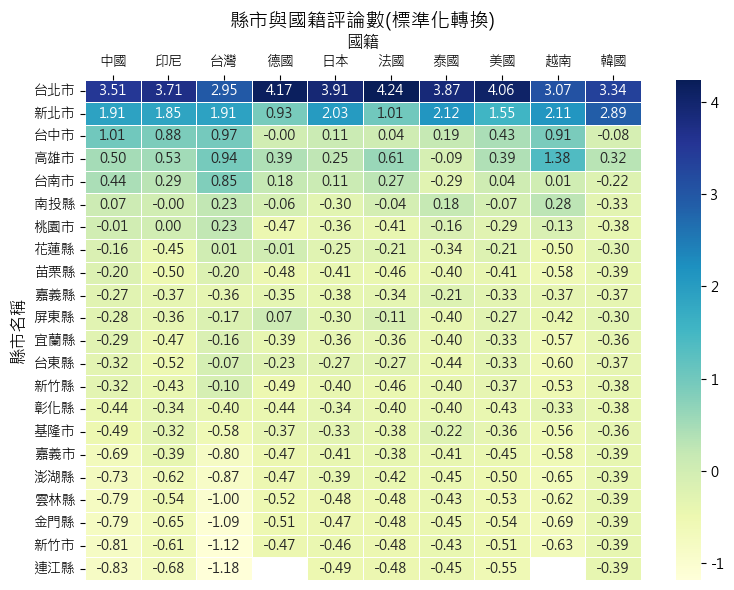

In [17]:
# 繪製熱力圖
plt.figure(figsize=(8, 6))
ax = sns.heatmap(city_counts_standardized.round(2), cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)

# 讓類別名稱標籤出現在上方
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()

plt.xticks(rotation=0)
plt.title("縣市與國籍評論數(標準化轉換)",fontsize=14)
plt.ylabel("縣市名稱",fontsize=12)
plt.xlabel("國籍",fontsize=12)
plt.tight_layout()
plt.show()

### 各國籍前n名留言數縣市

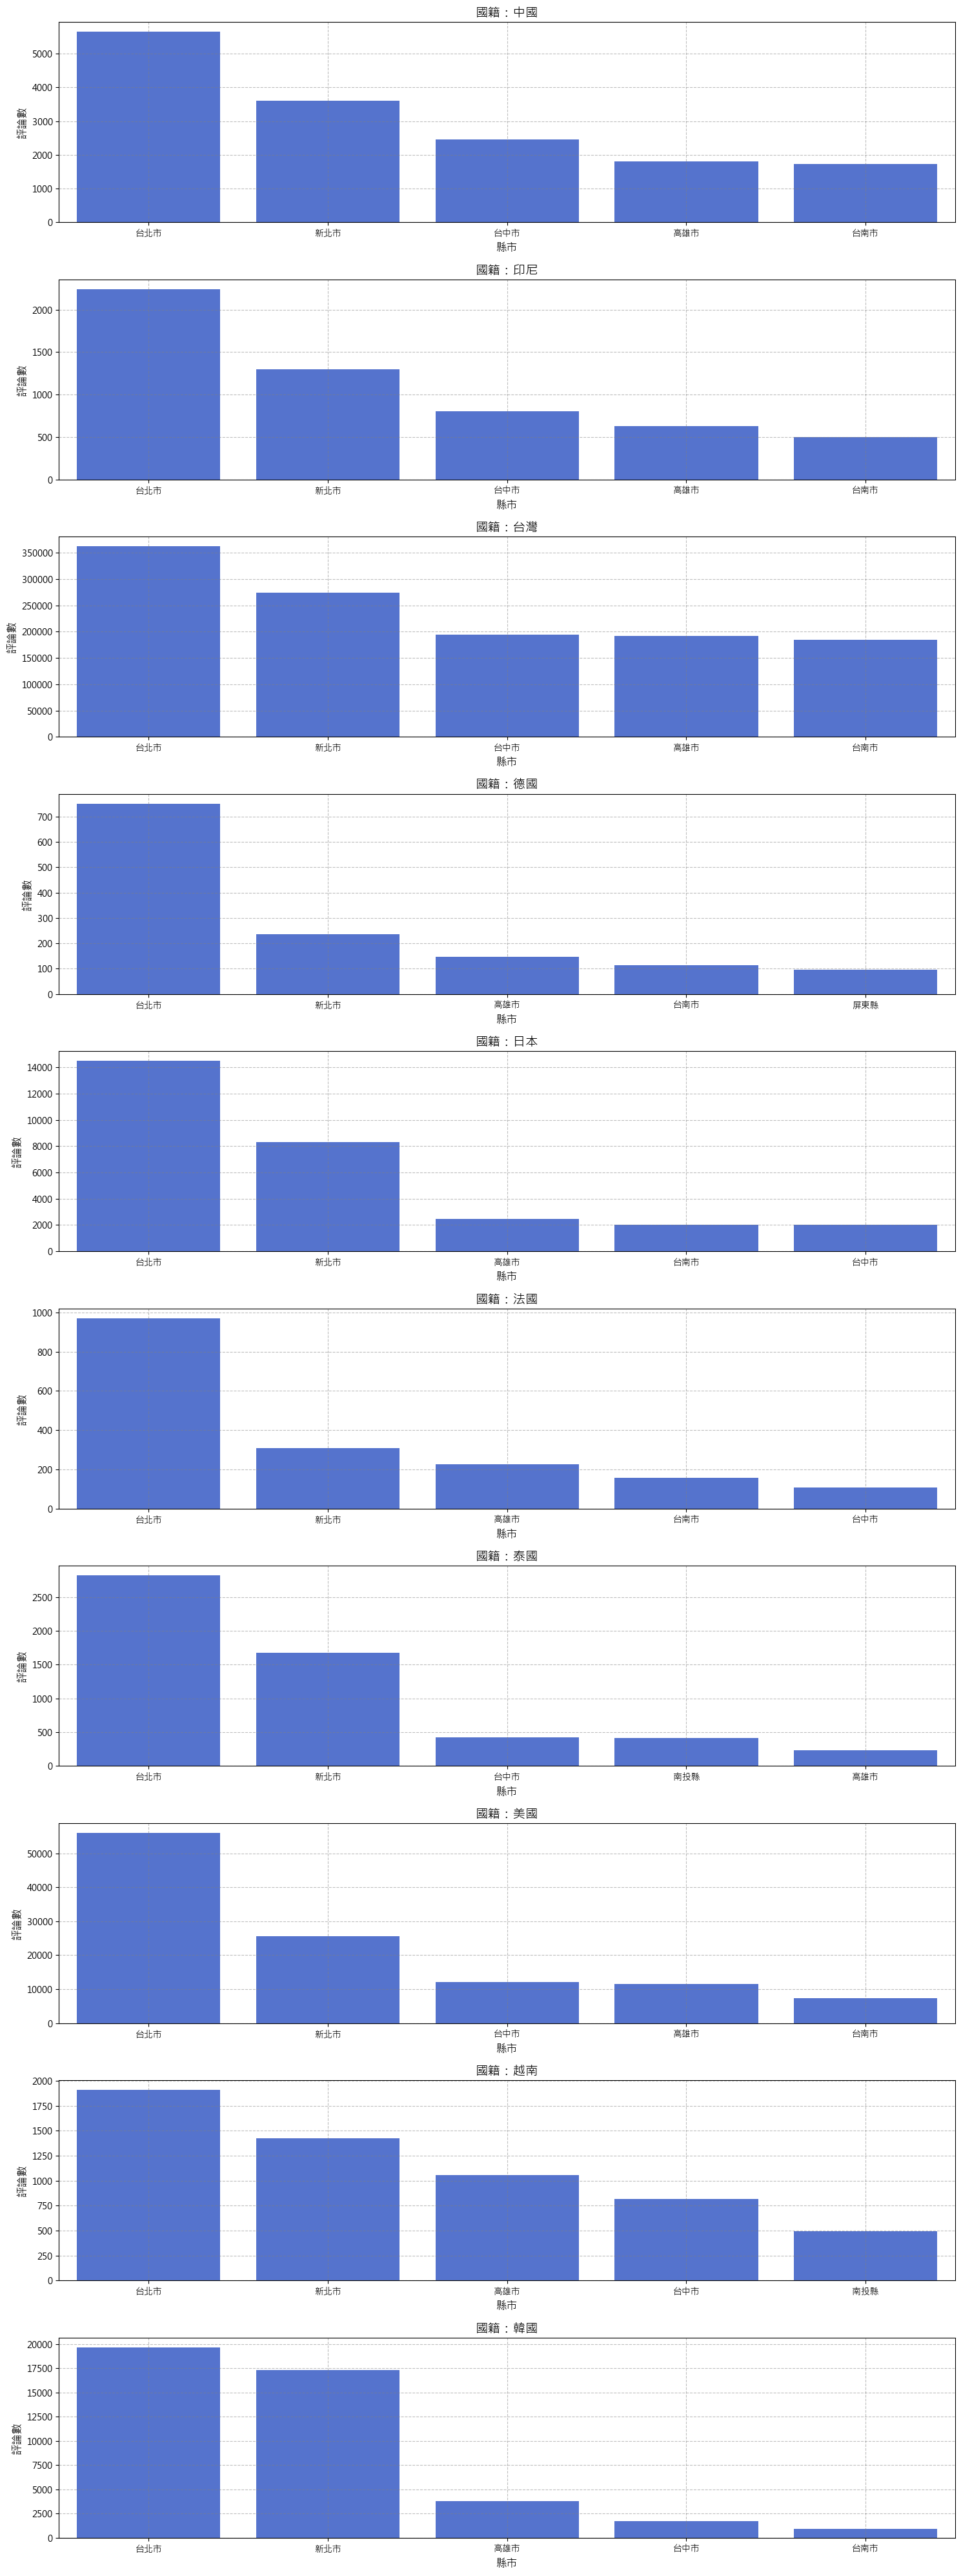

In [30]:
# 使用子圖的方式

# 前 n 名
n = 5

# 國籍數量
languages = city_counts.columns
num_languages = len(languages)

# 設定子圖的行數與列數
fig, axes = plt.subplots(nrows=num_languages, ncols=1, figsize=(15, 4 * num_languages))

# 繪製每個國籍的圖
for ax, language in zip(axes, languages):

    # 篩選出每個國籍前n多的縣市評論數的數據
    df_language = city_counts[city_counts[language] >= city_counts[language].nlargest(n).min()].sort_values(language,ascending=False)

    sns.barplot(
        data=df_language,
        x="address",
        y=f"{language}",
        ax=ax,
        ci=None,
        color='royalblue'
    )
    ax.set_title(f"國籍：{language}", fontsize=14) 
    ax.set_xlabel("縣市", fontsize=12) 
    ax.set_ylabel("評論數", fontsize=12) 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0) 
    ax.grid(linestyle='--',color='gray', alpha=0.5)

# 調整子圖間距
plt.tight_layout()
plt.show()

## 國籍與類別評論數量

### 各國籍各類別景點評論數量

In [31]:
# 縣市與國籍的評論數量樞紐分析
city_groups = new_basic_info_rating_838.pivot_table('score', index='attraction_type', columns='language', aggfunc='count').sort_values('中國',ascending=False)
city_groups

language           中國    印尼      台灣   德國     日本   法國    泰國     美國    越南     韓國
attraction_type                                                               
人文歷史             9202  2540  799916  708  17171  980  2591  57927  2398  24704
自然景觀與戶外          6320  2379  667609  355   5410  380  1168  30662  1561   7047
購物與美食            3368   813  246896  204   5168  272   796  24236   900   6304
娛樂與休閒            3033   853  401587   79   1854  123   458  14724   726   2040
城市景觀             2224   930  218788  260   3574  252   612  16515   883   3103
宗教聖地             1467   307  134505  193   3176  217   845   7157   946   2620

In [32]:
# 進行標準化
from sklearn.preprocessing import StandardScaler

# 標準化
scaler = StandardScaler()

city_groups_standardized = city_groups.copy()
for column in city_groups.columns:
    city_groups_standardized[column] = scaler.fit_transform(city_groups[[column]])

city_groups_standardized

language               中國        印尼        台灣        德國        日本        法國  \
attraction_type                                                               
人文歷史             1.844540  1.466967  1.590996  2.038309  2.173289  2.153997   
自然景觀與戶外          0.766907  1.275933  1.048982  0.275492 -0.126897  0.032993   
購物與美食           -0.336901 -0.582199 -0.674529 -0.478574 -0.174227 -0.348787   
娛樂與休閒           -0.462163 -0.534737 -0.040816 -1.102801 -0.822371 -0.875503   
城市景觀            -0.764664 -0.443373 -0.789678 -0.198920 -0.485977 -0.419487   
宗教聖地            -1.047720 -1.182592 -1.134955 -0.533506 -0.563817 -0.543213   

language               泰國        美國        越南        韓國  
attraction_type                                          
人文歷史             2.127691  1.996087  1.994572  2.172093  
自然景觀與戶外          0.126124  0.332961  0.558274 -0.075001  
購物與美食           -0.397125 -0.059016 -0.576006 -0.169558  
娛樂與休閒           -0.872550 -0.639235 -0.874591 -0.712209  
城市景觀            -0.655937 -0.529986 -0.605178 -0.576928  
宗教聖地            -0.328203 -1.100811 -0.497070 -0.638397

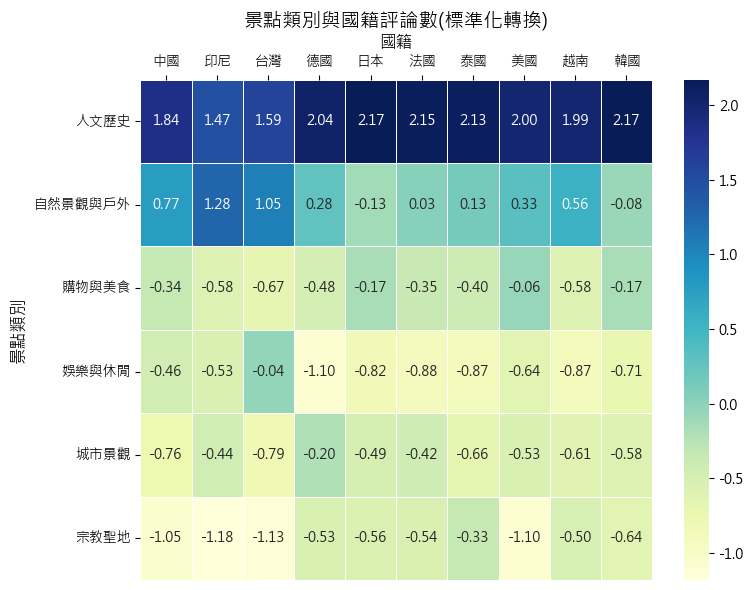

In [33]:
# 繪製熱力圖
plt.figure(figsize=(8, 6))
ax = sns.heatmap(city_groups_standardized.round(2), cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)

# 讓類別名稱標籤出現在上方
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()

plt.xticks(rotation=0)
plt.title("景點類別與國籍評論數(標準化轉換)",fontsize=14)
plt.ylabel("景點類別",fontsize=12)
plt.xlabel("國籍",fontsize=12)
plt.tight_layout()
plt.show()

### 景點類別評論數依國籍畫子圖

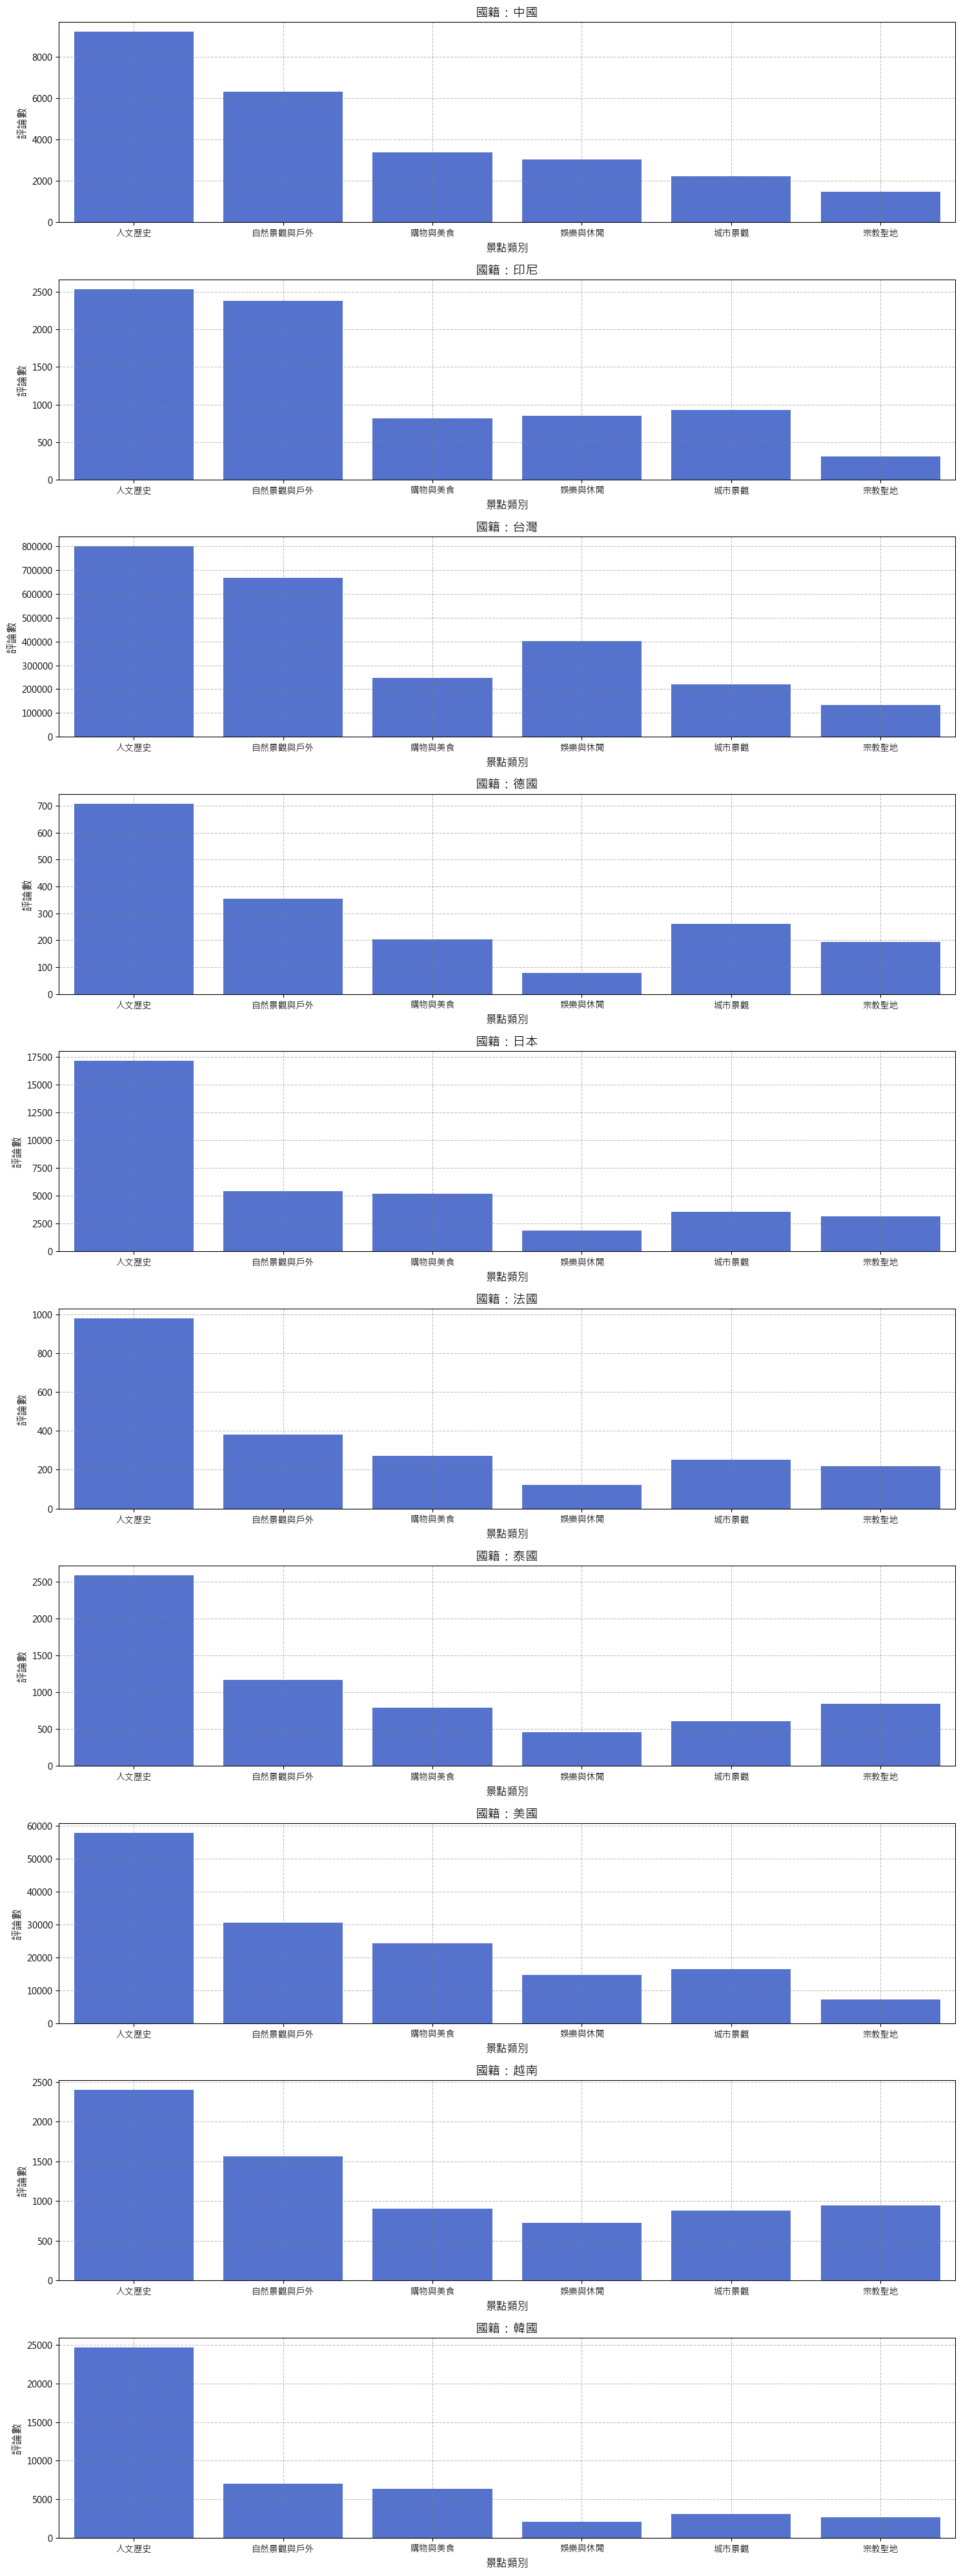

In [34]:
# 國籍數量
languages = city_groups.columns
num_languages = len(languages)

# 設定子圖的行數與列數
fig, axes = plt.subplots(nrows=num_languages, ncols=1, figsize=(15, 4 * num_languages))

# 繪製每個國籍的圖
for ax, language in zip(axes, languages):

    sns.barplot(
        data=city_groups,
        x="attraction_type",
        y=f"{language}",
        ax=ax,
        ci=None,
        color='royalblue'
    )
    ax.set_title(f"國籍：{language}", fontsize=14) 
    ax.set_xlabel("景點類別", fontsize=12) 
    ax.set_ylabel("評論數", fontsize=12) 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0) 
    ax.grid(linestyle='--',color='gray', alpha=0.5)

# 調整子圖間距
plt.tight_layout()
plt.show()

## 國籍與各景點評論數量

### 各國籍各景點評論數量

In [35]:
# 各國籍各景點評分數量樞紐分析
nationality_location_counts = new_basic_info_rating_838.pivot_table('score', index='gmap_location', columns='language', aggfunc='count')
nationality_location_counts

language                                              中國    印尼      台灣    德國  \
gmap_location                                                                  
8大森林樂園                                               6.0   NaN   936.0   NaN   
921地震教育園區                                           40.0   6.0  4645.0  10.0   
9420濱海公園                                             NaN   1.0   388.0   NaN   
The One南園人文客棧                                       20.0   NaN  1155.0   NaN   
一貫道寶光建德神威天臺山道場                                      14.0   4.0  1339.0   NaN   
...                                                  ...   ...     ...   ...   
龍磐公園                                                56.0   3.0  4843.0  14.0   
龍門露營渡假基地－新北(露營區，北部露營區 ，親子露營區 ，度假露營區休閒露營區，小木屋露營區...   7.0   1.0   659.0   NaN   
龍騰斷橋(魚藤坪斷橋)                                         52.0  14.0  9015.0   1.0   
龍鳳漁港                                                27.0  11.0  2063.0   NaN   
龜山島                                                  5.0   1.0   733.0   NaN   

language                                              日本   法國   泰國     美國  \
gmap_location                                                               
8大森林樂園                                               1.0  NaN  NaN   10.0   
921地震教育園區                                           25.0  6.0  1.0  342.0   
9420濱海公園                                             1.0  NaN  NaN    8.0   
The One南園人文客棧                                        3.0  1.0  NaN   52.0   
一貫道寶光建德神威天臺山道場                                       7.0  NaN  3.0   14.0   
...                                                  ...  ...  ...    ...   
龍磐公園                                                82.0  5.0  3.0  277.0   
龍門露營渡假基地－新北(露營區，北部露營區 ，親子露營區 ，度假露營區休閒露營區，小木屋露營區...   1.0  NaN  NaN   26.0   
龍騰斷橋(魚藤坪斷橋)                                         67.0  1.0  5.0  262.0   
龍鳳漁港                                                 9.0  NaN  2.0   38.0   
龜山島                                                  5.0  1.0  NaN   15.0   

language                                              越南     韓國  
gmap_location                                                    
8大森林樂園                                               NaN    NaN  
921地震教育園區                                            6.0   15.0  
9420濱海公園                                             NaN    NaN  
The One南園人文客棧                                        1.0    1.0  
一貫道寶光建德神威天臺山道場                                       NaN    NaN  
...                                                  ...    ...  
龍磐公園                                                12.0  159.0  
龍門露營渡假基地－新北(露營區，北部露營區 ，親子露營區 ，度假露營區休閒露營區，小木屋露營區...   1.0    1.0  
龍騰斷橋(魚藤坪斷橋)                                          6.0    5.0  
龍鳳漁港                                                 6.0    NaN  
龜山島                                                  2.0    3.0  

[776 rows x 10 columns]

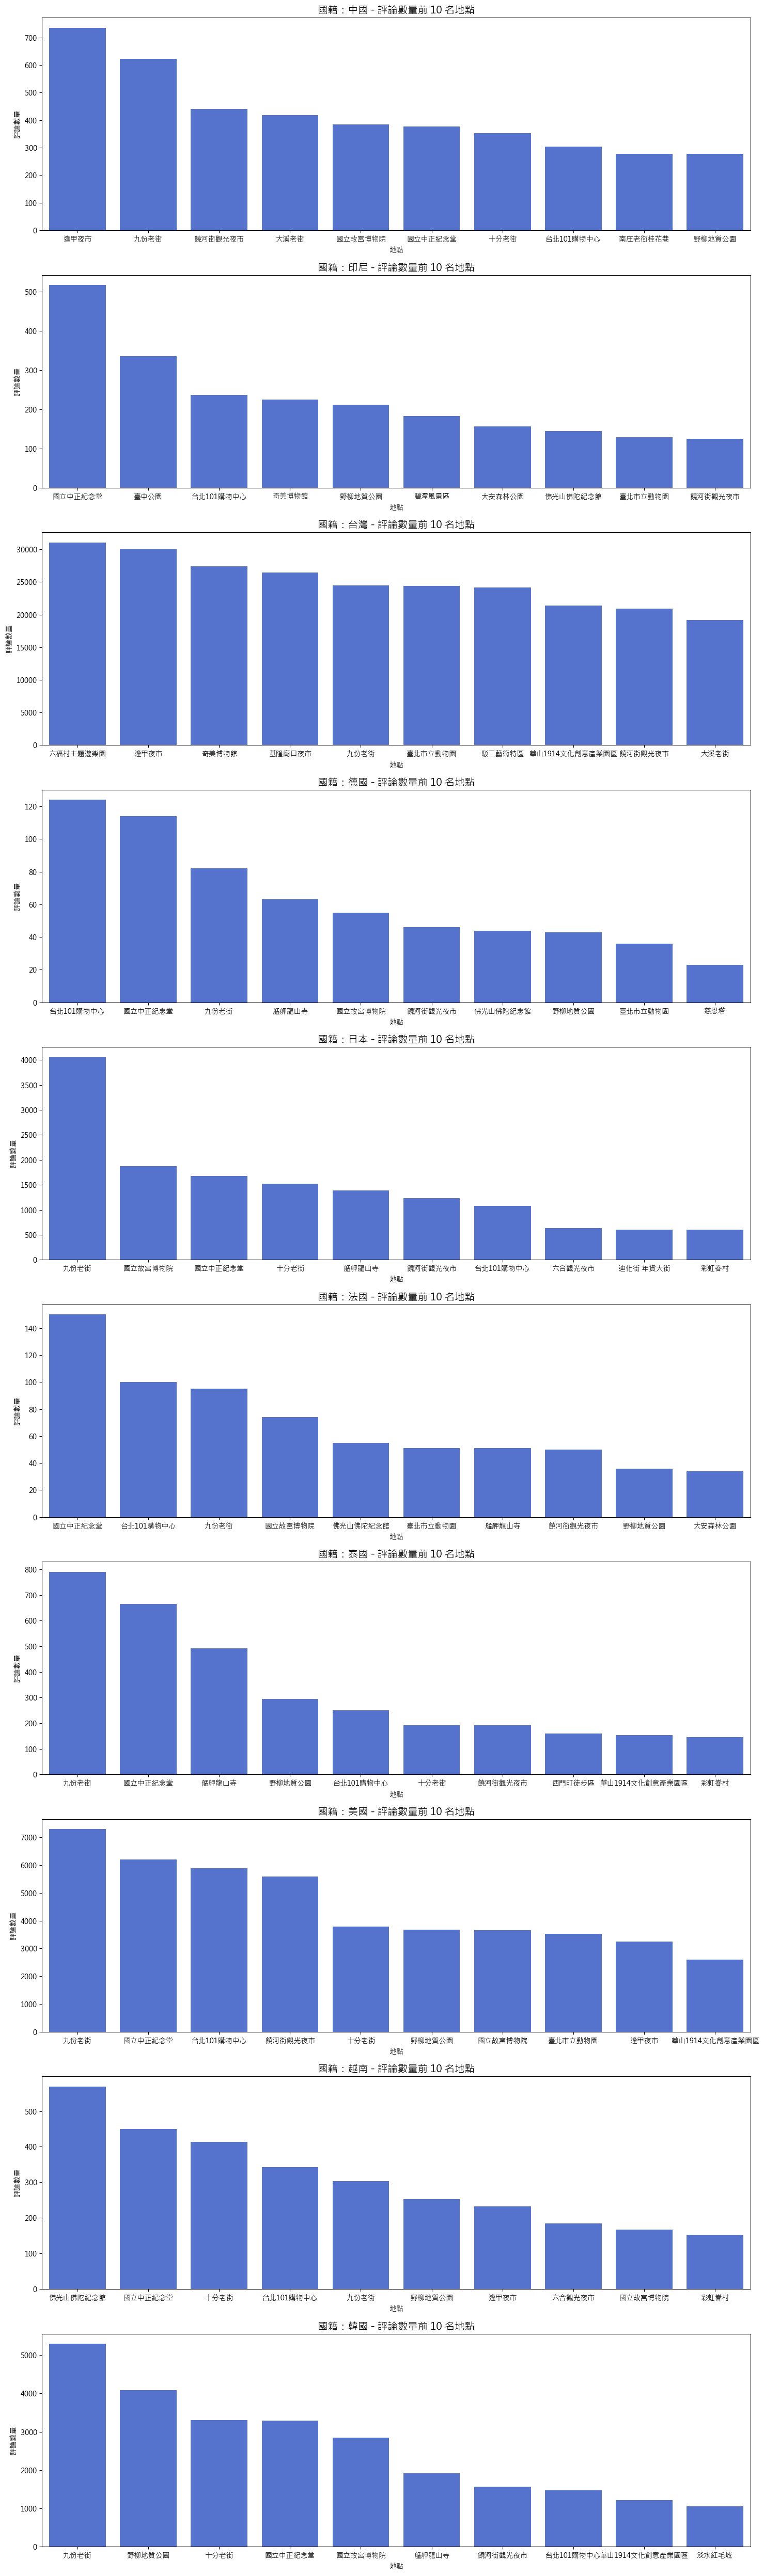

In [36]:
# 取得所有國籍
languages = nationality_location_counts.columns

# 設定子圖的行數與列數 (您可以根據國籍數量調整)
num_languages = len(languages)
fig, axes = plt.subplots(nrows=num_languages, ncols=1, figsize=(15, 5 * num_languages))

# 繪製每個國籍的圖
for ax, language in zip(axes, languages):
    # 取得該國籍的評論數量並排序
    top_10_locations = nationality_location_counts[language].nlargest(10)

    # 繪製長條圖
    sns.barplot(
        x=top_10_locations.index,
        y=top_10_locations.values,
        ax=ax,
        color="royalblue"
    )

    # 設定子圖樣式
    ax.set_title(f"國籍：{language} - 評論數量前 10 名地點", fontsize=14)
    ax.set_xlabel("地點")
    ax.set_ylabel("評論數量")
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### 找出各國籍評論數前50名的地點交集

language      中國     印尼       台灣     德國      日本     法國     泰國      美國     越南  \
九份老街       623.0  120.0  24443.0   82.0  4057.0   95.0  790.0  7296.0  304.0   
逢甲夜市       735.0  110.0  30063.0   18.0   280.0   14.0  140.0  3253.0  232.0   
奇美博物館      252.0  225.0  27429.0   10.0   257.0   18.0   29.0  1770.0  132.0   
饒河街觀光夜市    440.0  125.0  20893.0   46.0  1235.0   50.0  192.0  5602.0  146.0   
臺北市立動物園    219.0  129.0  24397.0   36.0   456.0   51.0   84.0  3520.0   92.0   
國立中正紀念堂    377.0  517.0  15490.0  114.0  1682.0  150.0  666.0  6210.0  450.0   
駁二藝術特區     195.0   67.0  24152.0   13.0   262.0   25.0   26.0  1612.0   40.0   
台北101購物中心  304.0  237.0  12787.0  124.0  1075.0  100.0  251.0  5895.0  342.0   
國立故宮博物院    385.0   72.0  11716.0   55.0  1879.0   74.0  136.0  3668.0  167.0   
六合觀光夜市     224.0   66.0  12470.0   18.0   631.0   22.0   44.0  1532.0  184.0   
佛光山佛陀紀念館   193.0  144.0  11473.0   44.0   131.0   55.0   63.0  1707.0  569.0   

language       韓國 average_count  
九份老街 

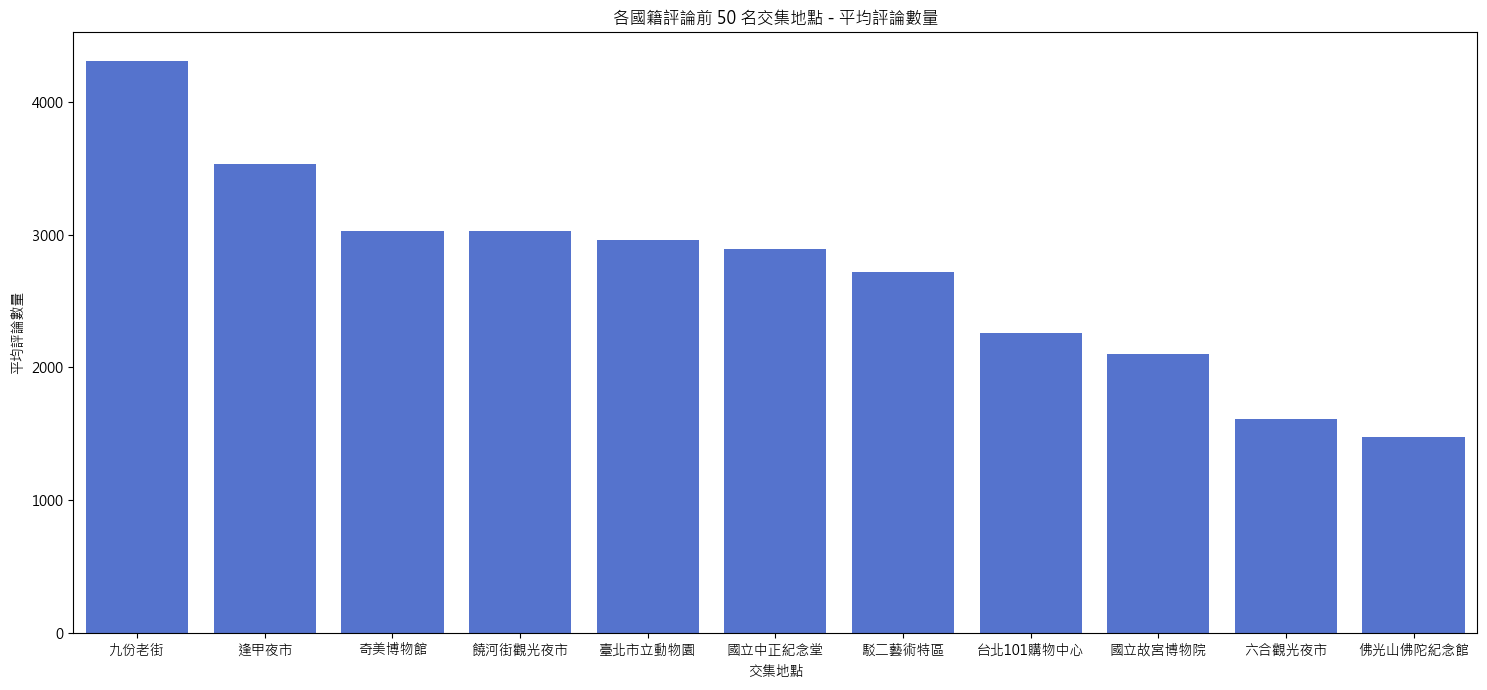

In [37]:
# 儲存每個國籍的前 n 名地點
n = 50

# 取得所有國籍
languages = nationality_location_counts.columns

top_locations_counts = {}
for language in languages:
    top_locations_counts[language] = nationality_location_counts[language].nlargest(n).index.tolist()

# 找出交集地點
intersected_locations = set(top_locations_counts[languages[0]])
for language in languages[1:]:
    intersected_locations = intersected_locations.intersection(set(top_locations_counts[language]))

# 將交集地點轉換為列表
intersected_locations_list = list(intersected_locations)

# 計算交集地點的平均評論數量
intersected_data = pd.DataFrame(index=intersected_locations_list, columns=languages)
for location in intersected_locations_list:
    for language in languages:
        intersected_data.loc[location, language] = nationality_location_counts.loc[location, language]

# 計算平均評論數量
intersected_data['average_count'] = intersected_data.mean(axis=1)

# 繪製長條圖
plt.figure(figsize=(15, 7))
sns.barplot(
    x=intersected_data['average_count'].sort_values(ascending=False).index,
    y=intersected_data['average_count'].sort_values(ascending=False),
    color="royalblue"
)

instersected_data_with_taiwan = intersected_data.sort_values('average_count',ascending=False)
print(instersected_data_with_taiwan)

# 設定圖表樣式
plt.title(f"各國籍評論前 {n} 名交集地點 - 平均評論數量")
plt.xlabel("交集地點")
plt.ylabel("平均評論數量")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

language      中國     印尼     德國      日本     法國     泰國      美國     越南      韓國  \
九份老街       623.0  120.0   82.0  4057.0   95.0  790.0  7296.0  304.0  5297.0   
國立中正紀念堂    377.0  517.0  114.0  1682.0  150.0  666.0  6210.0  450.0  3288.0   
台北101購物中心  304.0  237.0  124.0  1075.0  100.0  251.0  5895.0  342.0  1467.0   
十分老街       352.0  100.0   20.0  1526.0   31.0  192.0  3793.0  413.0  3299.0   
饒河街觀光夜市    440.0  125.0   46.0  1235.0   50.0  192.0  5602.0  146.0  1556.0   
野柳地質公園     278.0  212.0   43.0   407.0   36.0  295.0  3681.0  253.0  4084.0   
國立故宮博物院    385.0   72.0   55.0  1879.0   74.0  136.0  3668.0  167.0  2840.0   
逢甲夜市       735.0  110.0   18.0   280.0   14.0  140.0  3253.0  232.0   475.0   
臺北市立動物園    219.0  129.0   36.0   456.0   51.0   84.0  3520.0   92.0   590.0   
六合觀光夜市     224.0   66.0   18.0   631.0   22.0   44.0  1532.0  184.0   931.0   
彩虹眷村       220.0   57.0   10.0   601.0   33.0  146.0  2001.0  152.0   343.0   
佛光山佛陀紀念館   193.0  144.0   44.0   131.0   55.0   63.0

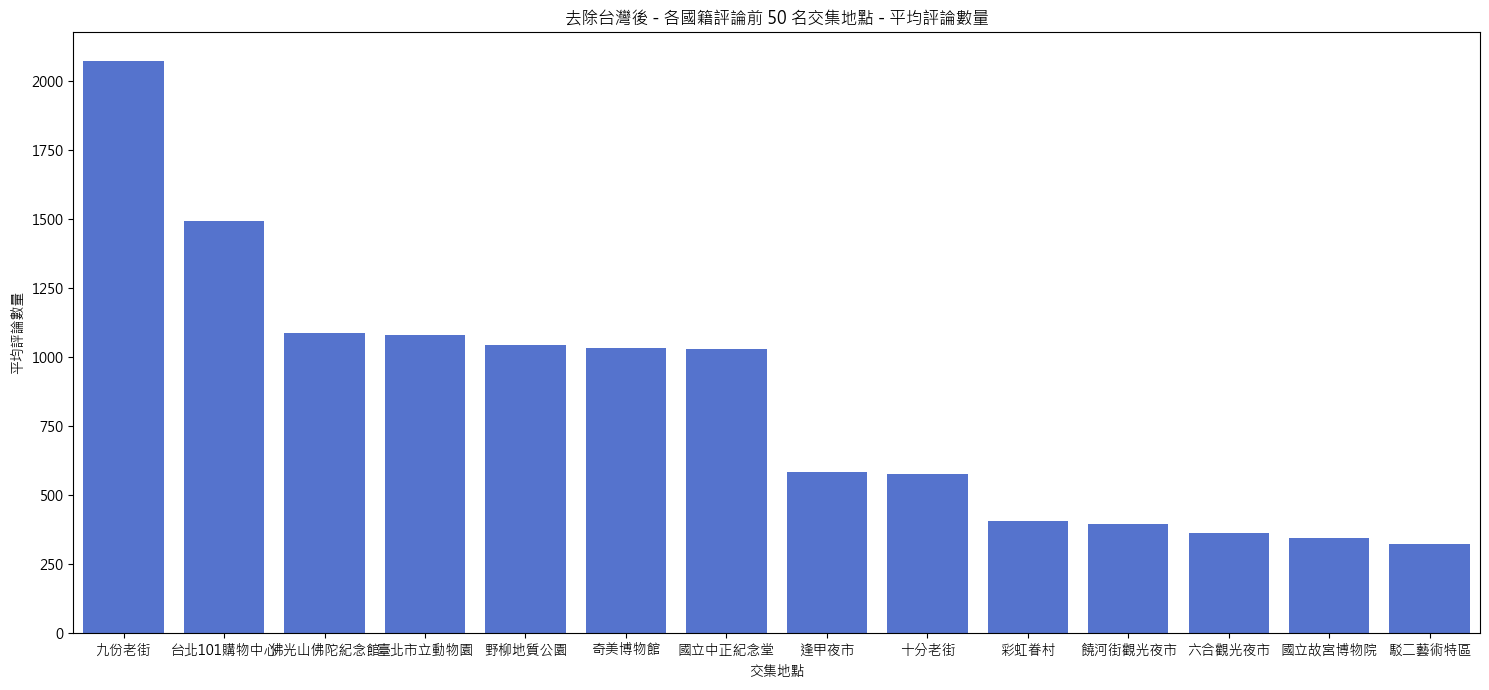

In [38]:
# 去除台灣之後的各國前n評論點交集
nationality_location_counts_no_taiwan = nationality_location_counts.drop(columns="台灣")

# 取得所有國籍
languages = nationality_location_counts_no_taiwan.columns

# 儲存每個國籍的前 n 名地點
top_n_locations_counts_no_taiwan = {}
for language in languages:
    top_n_locations_counts_no_taiwan[language] = nationality_location_counts_no_taiwan[language].nlargest(n).index.tolist()

# 找出交集地點
intersected_locations = set(top_n_locations_counts_no_taiwan[languages[0]])
for language in languages[1:]:
    intersected_locations = intersected_locations.intersection(set(top_n_locations_counts_no_taiwan[language]))

# 將交集地點轉換為列表
intersected_locations_list_no_taiwan = list(intersected_locations)

# 計算交集地點的平均評論數量
intersected_data = pd.DataFrame(index=intersected_locations_list_no_taiwan, columns=languages)
for location in intersected_locations_list_no_taiwan:
    for language in languages:
        intersected_data.loc[location, language] = nationality_location_counts_no_taiwan.loc[location, language]

# 計算平均評論數量
intersected_data['average_count'] = intersected_data.mean(axis=1)

# 繪製長條圖
plt.figure(figsize=(15, 7))
sns.barplot(
    x=intersected_data.index,
    y=intersected_data['average_count'].sort_values(ascending=False),
    color="royalblue"
)

instersected_data_no_taiwan = intersected_data.sort_values('average_count',ascending=False)
print(instersected_data_no_taiwan)

# 設定圖表樣式
plt.title(f"去除台灣後 - 各國籍評論前 {n} 名交集地點 - 平均評論數量")
plt.xlabel("交集地點")
plt.ylabel("平均評論數量")
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

### 與台灣不同評論數前n名的景點交集

In [41]:
# 找出有在各國前n名交集中 但沒有在台灣前n名的景點
for i in range(50, 250, 50):
    # 儲存每個國籍的前 n 名地點
    n = i

    # 取得所有國籍
    languages = nationality_location_counts.columns

    top_locations_counts = {}
    for language in languages:
        top_locations_counts[language] = nationality_location_counts[language].nlargest(n).index.tolist()

    # 找出交集地點
    intersected_locations = set(top_locations_counts[languages[0]])
    for language in languages[1:]:
        intersected_locations = intersected_locations.intersection(set(top_locations_counts[language]))

    # 將交集地點轉換為列表
    intersected_locations_list = list(intersected_locations)

    # 取得所有國籍
    languages = nationality_location_counts_no_taiwan.columns

    # 儲存每個國籍的前 n 名地點
    top_n_locations_counts_no_taiwan = {}
    for language in languages:
        top_n_locations_counts_no_taiwan[language] = nationality_location_counts_no_taiwan[language].nlargest(n).index.tolist()

    # 找出交集地點
    intersected_locations = set(top_n_locations_counts_no_taiwan[languages[0]])
    for language in languages[1:]:
        intersected_locations = intersected_locations.intersection(set(top_n_locations_counts_no_taiwan[language]))

    # 將交集地點轉換為列表
    intersected_locations_list_no_taiwan = list(intersected_locations)

    top_n_locations_no_taiwan_list = list(set(intersected_locations_list_no_taiwan).difference(set(intersected_locations_list)))
    top_n_locations_no_taiwan = nationality_location_counts_no_taiwan.loc[top_n_locations_no_taiwan_list]
    print(f"外國人評論前{i}名交集但不在台灣人評論數前{i}名的景點")
    print(top_n_locations_no_taiwan)
    print('='*100)

外國人評論前50名交集但不在台灣人評論數前50名的景點
language          中國     印尼    德國      日本    法國     泰國      美國     越南      韓國
gmap_location                                                                
彩虹眷村           220.0   57.0  10.0   601.0  33.0  146.0  2001.0  152.0   343.0
野柳地質公園         278.0  212.0  43.0   407.0  36.0  295.0  3681.0  253.0  4084.0
十分老街           352.0  100.0  20.0  1526.0  31.0  192.0  3793.0  413.0  3299.0
外國人評論前100名交集但不在台灣人評論數前100名的景點
language          中國    印尼    德國     日本    法國     泰國      美國     越南     韓國
gmap_location                                                             
西門町徒步區          98.0  49.0  15.0   98.0  15.0  160.0  1275.0  102.0  248.0
國立國父紀念館        138.0  53.0  21.0  212.0  29.0   60.0  1176.0   21.0  316.0
士林夜市            94.0  61.0  15.0  533.0  17.0   76.0  1122.0   34.0  501.0
外國人評論前150名交集但不在台灣人評論數前150名的景點
language         中國    印尼    德國     日本    法國     泰國      美國     越南     韓國
gmap_location                                                            

## 輸出

In [40]:
# 輸出成xlsx檔
dfs = {
    "國籍平均評分": nationality_groups,
    "國籍平均情感分數": nlp_nationality_groups,
    "國籍評分與情感分數並列": nationality_groups_all,
    "國籍縣市平均評分": top_city_per_nation,
    "國籍縣市平均情感分數": nlp_top_city_per_nation,
    "各國籍各縣市平均分數與情感分數並列": top_city_per_nation_all,
    "國籍類別平均評分": top_type_per_nation,
    "國籍類別平均情感分數": nlp_top_type_per_nation,
    "依類別並列評分與情感分數": top_type_per_nation_merged,
    "各國籍各縣市景點評論數量": city_counts,
    "各國籍各縣市景點評論數量(標準化)": city_counts_standardized,
    "各國籍各類別景點評論數量": city_groups,
    "各國籍各類別景點評論數量(標準化)": city_groups_standardized,
    "各國籍各景點評分數量": nationality_location_counts,
    "各國籍評論數前50名的地點交集": instersected_data_with_taiwan,
    "去除台灣之後的各國前50評論點交集": instersected_data_no_taiwan,
}

# 輸出成 Excel，並存到不同的 Sheet
with pd.ExcelWriter("../data/descriptive_statistic_analysis_by_nation.xlsx") as writer:
    for sheet_name, df in dfs.items():
        df.to_excel(writer, sheet_name=sheet_name)

print("已儲存！")

PermissionError: [Errno 13] Permission denied: '../data/descriptive_statistic_analysis_by_nation.xlsx'